In [109]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
df = pd.read_csv('../Data/allele_counts.tsv', header = None, index_col = None, sep='\t')
df.iloc[0,0] = 'Plate'  #replace the first 3 rows so table makes more sense when stacked
df.iloc[1,0] = 'Amplicon'
df.iloc[2,0] = 'Genotype'
df = df.T #transpose the df
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df

,Plate,Amplicon,Genotype,A1,A2,A3,A4,A5,A6,A7,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
1,AS-209,EL_SRSF2,MT,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,AS-209,EL_SRSF2,WT,0,0,3,0,0,0,0,...,0,1,1,3,0,3,4,1,248,4
3,AS-209,EL_TET2a,MT,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,13,0,0
4,AS-209,EL_TET2a,WT,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,50,24,55
5,AS-209,EL_TET2b,MT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,AS-207,EL_TET2b,WT,1,3,9,4,5,1,1,...,2,27,8,5,20,58,8,18,1,5
217,AS-207,EL_TGFB3_c,MT,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
218,AS-207,EL_TGFB3_c,WT,0,0,0,0,0,0,0,...,0,3,0,0,0,1,0,0,0,0
219,AS-207,EL_TGFB3_g,MT,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,1,0


In [20]:
#Import information about plate cell type and patient
key = pd.read_excel('../Data/Amplicon_metadata_fixed.xlsx', sheet_name = 'PlateID')
key = key.drop(['Cell Origin', 'Plate Nr', 'Plate Name','Nr of cells', 'fcs-fle' ], axis=1)
key.rename(columns = {'Comments2':'Plate'}, inplace = True)
key.rename(columns = {'Cell-group':'Celltype'}, inplace = True)
key

,Patient,Celltype,Plate
0,EL,NEs,AS-203
1,EL,NEs,AS-204
2,EL,Monocytes,AS-202
3,EL,Monocytes,AS-205
4,EL,nBCs,AS-206
5,EL,nBCs,AS-209
6,EL,CD34+,AS-207
7,EL,CD34+,AS-208
8,EL,CD34+/38-,AS-210
9,GR,NEs,AS-215


In [4]:
#Merge allele counts and extra data
allele_counts = pd.merge(df, key, how = 'outer', on =['Plate'])
allele_counts

,Plate,Amplicon,Genotype,A1,A2,A3,A4,A5,A6,A7,...,P17,P18,P19,P20,P21,P22,P23,P24,Patient,Cell-group
0,AS-209,EL_SRSF2,MT,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,EL,nBCs
1,AS-209,EL_SRSF2,WT,0,0,3,0,0,0,0,...,1,3,0,3,4,1,248,4,EL,nBCs
2,AS-209,EL_TET2a,MT,0,2,0,0,0,0,0,...,0,0,0,0,0,13,0,0,EL,nBCs
3,AS-209,EL_TET2a,WT,0,1,0,0,0,0,0,...,0,0,0,0,1,50,24,55,EL,nBCs
4,AS-209,EL_TET2b,MT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,EL,nBCs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,AS-207,EL_TET2b,WT,1,3,9,4,5,1,1,...,8,5,20,58,8,18,1,5,EL,CD34+
216,AS-207,EL_TGFB3_c,MT,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,EL,CD34+
217,AS-207,EL_TGFB3_c,WT,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,EL,CD34+
218,AS-207,EL_TGFB3_g,MT,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,EL,CD34+


In [5]:
#Re-order the columns
cols = list(allele_counts.columns.values) #Fetch column names as a list, these were manually edited below to move column order
allele_counts = allele_counts[['Plate',
 'Genotype',
 'Patient',
 'Cell-group',
 'Amplicon',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E15',
 'E16',
 'E17',
 'E18',
 'E19',
 'E20',
 'E21',
 'E22',
 'E23',
 'E24',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G14',
 'G15',
 'G16',
 'G17',
 'G18',
 'G19',
 'G20',
 'G21',
 'G22',
 'G23',
 'G24',
 'H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'H8',
 'H9',
 'H10',
 'H11',
 'H12',
 'H13',
 'H14',
 'H15',
 'H16',
 'H17',
 'H18',
 'H19',
 'H20',
 'H21',
 'H22',
 'H23',
 'H24',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'I10',
 'I11',
 'I12',
 'I13',
 'I14',
 'I15',
 'I16',
 'I17',
 'I18',
 'I19',
 'I20',
 'I21',
 'I22',
 'I23',
 'I24',
 'J1',
 'J2',
 'J3',
 'J4',
 'J5',
 'J6',
 'J7',
 'J8',
 'J9',
 'J10',
 'J11',
 'J12',
 'J13',
 'J14',
 'J15',
 'J16',
 'J17',
 'J18',
 'J19',
 'J20',
 'J21',
 'J22',
 'J23',
 'J24',
 'K1',
 'K2',
 'K3',
 'K4',
 'K5',
 'K6',
 'K7',
 'K8',
 'K9',
 'K10',
 'K11',
 'K12',
 'K13',
 'K14',
 'K15',
 'K16',
 'K17',
 'K18',
 'K19',
 'K20',
 'K21',
 'K22',
 'K23',
 'K24',
 'L1',
 'L2',
 'L3',
 'L4',
 'L5',
 'L6',
 'L7',
 'L8',
 'L9',
 'L10',
 'L11',
 'L12',
 'L13',
 'L14',
 'L15',
 'L16',
 'L17',
 'L18',
 'L19',
 'L20',
 'L21',
 'L22',
 'L23',
 'L24',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'M10',
 'M11',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'M17',
 'M18',
 'M19',
 'M20',
 'M21',
 'M22',
 'M23',
 'M24',
 'N1',
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'N11',
 'N12',
 'N13',
 'N14',
 'N15',
 'N16',
 'N17',
 'N18',
 'N19',
 'N20',
 'N21',
 'N22',
 'N23',
 'N24',
 'O1',
 'O2',
 'O3',
 'O4',
 'O5',
 'O6',
 'O7',
 'O8',
 'O9',
 'O10',
 'O11',
 'O12',
 'O13',
 'O14',
 'O15',
 'O16',
 'O17',
 'O18',
 'O19',
 'O20',
 'O21',
 'O22',
 'O23',
 'O24',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 ]]
allele_counts

,Plate,Genotype,Patient,Cell-group,Amplicon,A1,A2,A3,A4,A5,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,AS-209,MT,EL,nBCs,EL_SRSF2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,AS-209,WT,EL,nBCs,EL_SRSF2,0,0,3,0,0,...,0,1,1,3,0,3,4,1,248,4
2,AS-209,MT,EL,nBCs,EL_TET2a,0,2,0,0,0,...,0,1,0,0,0,0,0,13,0,0
3,AS-209,WT,EL,nBCs,EL_TET2a,0,1,0,0,0,...,0,0,0,0,0,0,1,50,24,55
4,AS-209,MT,EL,nBCs,EL_TET2b,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,AS-207,WT,EL,CD34+,EL_TET2b,1,3,9,4,5,...,2,27,8,5,20,58,8,18,1,5
216,AS-207,MT,EL,CD34+,EL_TGFB3_c,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,AS-207,WT,EL,CD34+,EL_TGFB3_c,0,0,0,0,0,...,0,3,0,0,0,1,0,0,0,0
218,AS-207,MT,EL,CD34+,EL_TGFB3_g,0,0,0,0,0,...,0,10,0,0,0,0,0,0,1,0


In [15]:
#Set up some lists for iteration
patients = allele_counts['Patient'].drop_duplicates().to_list()
plates = key['Plate'].tolist()
amplicons = allele_counts['Amplicon'].drop_duplicates().to_list()
genos = allele_counts['Genotype'].drop_duplicates().to_list()
wells = list(allele_counts.columns[5:].values)

In [22]:
#Make a dictionary to associate plates with patients and plate with cell type
plate_pt_dict = dict(zip(key.Plate, key.Patient))
plate_cell_dict = dict(zip(key.Plate, key.Celltype))

In [8]:
#Try and pull our just a single plate - this works
allele_counts.loc[allele_counts['Plate'].str.contains('AS-209')]

,Plate,Genotype,Patient,Cell-group,Amplicon,A1,A2,A3,A4,A5,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,AS-209,MT,EL,nBCs,EL_SRSF2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,AS-209,WT,EL,nBCs,EL_SRSF2,0,0,3,0,0,...,0,1,1,3,0,3,4,1,248,4
2,AS-209,MT,EL,nBCs,EL_TET2a,0,2,0,0,0,...,0,1,0,0,0,0,0,13,0,0
3,AS-209,WT,EL,nBCs,EL_TET2a,0,1,0,0,0,...,0,0,0,0,0,0,1,50,24,55
4,AS-209,MT,EL,nBCs,EL_TET2b,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AS-209,WT,EL,nBCs,EL_TET2b,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,AS-209,MT,EL,nBCs,EL_TGFB3_g,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,AS-209,WT,EL,nBCs,EL_TGFB3_g,0,0,0,0,0,...,0,1,4,2,5,4,2,330,6,581


In [9]:
#Making a small list of plates to try some loop functions
miniplates = ['AS-209', 'AS-207']

In [25]:
#This cell returns total read counts per well per plate
# Trying to get a more useful output format
for plate in miniplates: #iterate by plate
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        print(plate, j, m, well, total) #print the counts for each plate/well

AS-209 EL nBCs A1 0
AS-209 EL nBCs A2 3
AS-209 EL nBCs A3 3
AS-209 EL nBCs A4 0
AS-209 EL nBCs A5 0
AS-209 EL nBCs A6 0
AS-209 EL nBCs A7 0
AS-209 EL nBCs A8 0
AS-209 EL nBCs A9 101
AS-209 EL nBCs A10 0
AS-209 EL nBCs A11 0
AS-209 EL nBCs A12 0
AS-209 EL nBCs A13 0
AS-209 EL nBCs A14 0
AS-209 EL nBCs A15 0
AS-209 EL nBCs A16 2
AS-209 EL nBCs A17 0
AS-209 EL nBCs A18 0
AS-209 EL nBCs A19 0
AS-209 EL nBCs A20 0
AS-209 EL nBCs A21 0
AS-209 EL nBCs A22 3
AS-209 EL nBCs A23 6
AS-209 EL nBCs A24 2
AS-209 EL nBCs B1 1
AS-209 EL nBCs B2 6
AS-209 EL nBCs B3 6
AS-209 EL nBCs B4 7
AS-209 EL nBCs B5 1
AS-209 EL nBCs B6 3
AS-209 EL nBCs B7 3
AS-209 EL nBCs B8 5
AS-209 EL nBCs B9 3
AS-209 EL nBCs B10 0
AS-209 EL nBCs B11 1
AS-209 EL nBCs B12 5
AS-209 EL nBCs B13 9
AS-209 EL nBCs B14 0
AS-209 EL nBCs B15 2
AS-209 EL nBCs B16 29
AS-209 EL nBCs B17 6
AS-209 EL nBCs B18 3
AS-209 EL nBCs B19 70
AS-209 EL nBCs B20 3
AS-209 EL nBCs B21 4
AS-209 EL nBCs B22 68
AS-209 EL nBCs B23 7
AS-209 EL nBCs B24 12
AS-2

AS-207 EL CD34+ D20 9350
AS-207 EL CD34+ D21 751
AS-207 EL CD34+ D22 312
AS-207 EL CD34+ D23 910
AS-207 EL CD34+ D24 158
AS-207 EL CD34+ E1 190
AS-207 EL CD34+ E2 478
AS-207 EL CD34+ E3 226
AS-207 EL CD34+ E4 260
AS-207 EL CD34+ E5 79
AS-207 EL CD34+ E6 864
AS-207 EL CD34+ E7 214
AS-207 EL CD34+ E8 760
AS-207 EL CD34+ E9 3259
AS-207 EL CD34+ E10 53
AS-207 EL CD34+ E11 1560
AS-207 EL CD34+ E12 4430
AS-207 EL CD34+ E13 630
AS-207 EL CD34+ E14 139
AS-207 EL CD34+ E15 495
AS-207 EL CD34+ E16 1059
AS-207 EL CD34+ E17 3494
AS-207 EL CD34+ E18 7042
AS-207 EL CD34+ E19 5434
AS-207 EL CD34+ E20 11212
AS-207 EL CD34+ E21 5334
AS-207 EL CD34+ E22 5582
AS-207 EL CD34+ E23 486
AS-207 EL CD34+ E24 285
AS-207 EL CD34+ F1 59
AS-207 EL CD34+ F2 125
AS-207 EL CD34+ F3 119
AS-207 EL CD34+ F4 144
AS-207 EL CD34+ F5 65
AS-207 EL CD34+ F6 366
AS-207 EL CD34+ F7 474
AS-207 EL CD34+ F8 245
AS-207 EL CD34+ F9 254
AS-207 EL CD34+ F10 41
AS-207 EL CD34+ F11 101
AS-207 EL CD34+ F12 453
AS-207 EL CD34+ F13 1544
AS

In [23]:
#Now try and return reads per amplicon per well, but only look at amplicons from the patient with samples on the plate
for plate in miniplates: #iterate by plate
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])]  #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for amp in amplicons: #now iterate by amplicons 
        k = i.loc[i['Amplicon'].isin([amp])]  #Make a sub df for each amplicon
        if (j in amp)==False:  #if the amplicon is for patient samples not onthe plate keep going
            continue
                
        else:
            for well in wells:  
                total = k[well].astype(int).sum()  #sum the read counts for each well for each amplicon
                print(plate, j, m, amp, well, total)  #print the output

AS-209 EL nBCs EL_SRSF2 A1 0
AS-209 EL nBCs EL_SRSF2 A2 0
AS-209 EL nBCs EL_SRSF2 A3 3
AS-209 EL nBCs EL_SRSF2 A4 0
AS-209 EL nBCs EL_SRSF2 A5 0
AS-209 EL nBCs EL_SRSF2 A6 0
AS-209 EL nBCs EL_SRSF2 A7 0
AS-209 EL nBCs EL_SRSF2 A8 0
AS-209 EL nBCs EL_SRSF2 A9 0
AS-209 EL nBCs EL_SRSF2 A10 0
AS-209 EL nBCs EL_SRSF2 A11 0
AS-209 EL nBCs EL_SRSF2 A12 0
AS-209 EL nBCs EL_SRSF2 A13 0
AS-209 EL nBCs EL_SRSF2 A14 0
AS-209 EL nBCs EL_SRSF2 A15 0
AS-209 EL nBCs EL_SRSF2 A16 0
AS-209 EL nBCs EL_SRSF2 A17 0
AS-209 EL nBCs EL_SRSF2 A18 0
AS-209 EL nBCs EL_SRSF2 A19 0
AS-209 EL nBCs EL_SRSF2 A20 0
AS-209 EL nBCs EL_SRSF2 A21 0
AS-209 EL nBCs EL_SRSF2 A22 0
AS-209 EL nBCs EL_SRSF2 A23 5
AS-209 EL nBCs EL_SRSF2 A24 0
AS-209 EL nBCs EL_SRSF2 B1 0
AS-209 EL nBCs EL_SRSF2 B2 0
AS-209 EL nBCs EL_SRSF2 B3 5
AS-209 EL nBCs EL_SRSF2 B4 1
AS-209 EL nBCs EL_SRSF2 B5 0
AS-209 EL nBCs EL_SRSF2 B6 1
AS-209 EL nBCs EL_SRSF2 B7 1
AS-209 EL nBCs EL_SRSF2 B8 3
AS-209 EL nBCs EL_SRSF2 B9 1
AS-209 EL nBCs EL_SRSF2 B10 

AS-209 EL nBCs EL_SRSF2 N6 0
AS-209 EL nBCs EL_SRSF2 N7 0
AS-209 EL nBCs EL_SRSF2 N8 1
AS-209 EL nBCs EL_SRSF2 N9 0
AS-209 EL nBCs EL_SRSF2 N10 0
AS-209 EL nBCs EL_SRSF2 N11 0
AS-209 EL nBCs EL_SRSF2 N12 3
AS-209 EL nBCs EL_SRSF2 N13 0
AS-209 EL nBCs EL_SRSF2 N14 0
AS-209 EL nBCs EL_SRSF2 N15 0
AS-209 EL nBCs EL_SRSF2 N16 0
AS-209 EL nBCs EL_SRSF2 N17 0
AS-209 EL nBCs EL_SRSF2 N18 0
AS-209 EL nBCs EL_SRSF2 N19 1
AS-209 EL nBCs EL_SRSF2 N20 0
AS-209 EL nBCs EL_SRSF2 N21 0
AS-209 EL nBCs EL_SRSF2 N22 0
AS-209 EL nBCs EL_SRSF2 N23 8
AS-209 EL nBCs EL_SRSF2 N24 0
AS-209 EL nBCs EL_SRSF2 O1 2
AS-209 EL nBCs EL_SRSF2 O2 2
AS-209 EL nBCs EL_SRSF2 O3 6
AS-209 EL nBCs EL_SRSF2 O4 3
AS-209 EL nBCs EL_SRSF2 O5 0
AS-209 EL nBCs EL_SRSF2 O6 1
AS-209 EL nBCs EL_SRSF2 O7 1
AS-209 EL nBCs EL_SRSF2 O8 1
AS-209 EL nBCs EL_SRSF2 O9 0
AS-209 EL nBCs EL_SRSF2 O10 0
AS-209 EL nBCs EL_SRSF2 O11 0
AS-209 EL nBCs EL_SRSF2 O12 0
AS-209 EL nBCs EL_SRSF2 O13 2
AS-209 EL nBCs EL_SRSF2 O14 0
AS-209 EL nBCs EL_SRSF2

AS-209 EL nBCs EL_TET2a J18 0
AS-209 EL nBCs EL_TET2a J19 0
AS-209 EL nBCs EL_TET2a J20 0
AS-209 EL nBCs EL_TET2a J21 0
AS-209 EL nBCs EL_TET2a J22 0
AS-209 EL nBCs EL_TET2a J23 0
AS-209 EL nBCs EL_TET2a J24 0
AS-209 EL nBCs EL_TET2a K1 0
AS-209 EL nBCs EL_TET2a K2 2
AS-209 EL nBCs EL_TET2a K3 0
AS-209 EL nBCs EL_TET2a K4 0
AS-209 EL nBCs EL_TET2a K5 25
AS-209 EL nBCs EL_TET2a K6 0
AS-209 EL nBCs EL_TET2a K7 0
AS-209 EL nBCs EL_TET2a K8 0
AS-209 EL nBCs EL_TET2a K9 0
AS-209 EL nBCs EL_TET2a K10 0
AS-209 EL nBCs EL_TET2a K11 0
AS-209 EL nBCs EL_TET2a K12 0
AS-209 EL nBCs EL_TET2a K13 1
AS-209 EL nBCs EL_TET2a K14 0
AS-209 EL nBCs EL_TET2a K15 0
AS-209 EL nBCs EL_TET2a K16 0
AS-209 EL nBCs EL_TET2a K17 1
AS-209 EL nBCs EL_TET2a K18 0
AS-209 EL nBCs EL_TET2a K19 0
AS-209 EL nBCs EL_TET2a K20 1
AS-209 EL nBCs EL_TET2a K21 0
AS-209 EL nBCs EL_TET2a K22 1
AS-209 EL nBCs EL_TET2a K23 0
AS-209 EL nBCs EL_TET2a K24 0
AS-209 EL nBCs EL_TET2a L1 0
AS-209 EL nBCs EL_TET2a L2 0
AS-209 EL nBCs EL_TE

AS-209 EL nBCs EL_TET2b G1 0
AS-209 EL nBCs EL_TET2b G2 0
AS-209 EL nBCs EL_TET2b G3 0
AS-209 EL nBCs EL_TET2b G4 1
AS-209 EL nBCs EL_TET2b G5 0
AS-209 EL nBCs EL_TET2b G6 0
AS-209 EL nBCs EL_TET2b G7 0
AS-209 EL nBCs EL_TET2b G8 0
AS-209 EL nBCs EL_TET2b G9 0
AS-209 EL nBCs EL_TET2b G10 0
AS-209 EL nBCs EL_TET2b G11 0
AS-209 EL nBCs EL_TET2b G12 0
AS-209 EL nBCs EL_TET2b G13 0
AS-209 EL nBCs EL_TET2b G14 0
AS-209 EL nBCs EL_TET2b G15 0
AS-209 EL nBCs EL_TET2b G16 0
AS-209 EL nBCs EL_TET2b G17 0
AS-209 EL nBCs EL_TET2b G18 0
AS-209 EL nBCs EL_TET2b G19 1
AS-209 EL nBCs EL_TET2b G20 0
AS-209 EL nBCs EL_TET2b G21 0
AS-209 EL nBCs EL_TET2b G22 0
AS-209 EL nBCs EL_TET2b G23 0
AS-209 EL nBCs EL_TET2b G24 0
AS-209 EL nBCs EL_TET2b H1 0
AS-209 EL nBCs EL_TET2b H2 0
AS-209 EL nBCs EL_TET2b H3 0
AS-209 EL nBCs EL_TET2b H4 0
AS-209 EL nBCs EL_TET2b H5 0
AS-209 EL nBCs EL_TET2b H6 0
AS-209 EL nBCs EL_TET2b H7 0
AS-209 EL nBCs EL_TET2b H8 2
AS-209 EL nBCs EL_TET2b H9 0
AS-209 EL nBCs EL_TET2b H10 

AS-209 EL nBCs EL_TGFB3_g K8 0
AS-209 EL nBCs EL_TGFB3_g K9 0
AS-209 EL nBCs EL_TGFB3_g K10 0
AS-209 EL nBCs EL_TGFB3_g K11 0
AS-209 EL nBCs EL_TGFB3_g K12 1
AS-209 EL nBCs EL_TGFB3_g K13 0
AS-209 EL nBCs EL_TGFB3_g K14 0
AS-209 EL nBCs EL_TGFB3_g K15 0
AS-209 EL nBCs EL_TGFB3_g K16 0
AS-209 EL nBCs EL_TGFB3_g K17 0
AS-209 EL nBCs EL_TGFB3_g K18 0
AS-209 EL nBCs EL_TGFB3_g K19 0
AS-209 EL nBCs EL_TGFB3_g K20 0
AS-209 EL nBCs EL_TGFB3_g K21 0
AS-209 EL nBCs EL_TGFB3_g K22 0
AS-209 EL nBCs EL_TGFB3_g K23 0
AS-209 EL nBCs EL_TGFB3_g K24 3
AS-209 EL nBCs EL_TGFB3_g L1 0
AS-209 EL nBCs EL_TGFB3_g L2 0
AS-209 EL nBCs EL_TGFB3_g L3 0
AS-209 EL nBCs EL_TGFB3_g L4 0
AS-209 EL nBCs EL_TGFB3_g L5 0
AS-209 EL nBCs EL_TGFB3_g L6 0
AS-209 EL nBCs EL_TGFB3_g L7 0
AS-209 EL nBCs EL_TGFB3_g L8 0
AS-209 EL nBCs EL_TGFB3_g L9 0
AS-209 EL nBCs EL_TGFB3_g L10 0
AS-209 EL nBCs EL_TGFB3_g L11 0
AS-209 EL nBCs EL_TGFB3_g L12 0
AS-209 EL nBCs EL_TGFB3_g L13 0
AS-209 EL nBCs EL_TGFB3_g L14 0
AS-209 EL nBCs EL_T

AS-209 EL nBCs EL_TGFB3_c H14 0
AS-209 EL nBCs EL_TGFB3_c H15 0
AS-209 EL nBCs EL_TGFB3_c H16 0
AS-209 EL nBCs EL_TGFB3_c H17 0
AS-209 EL nBCs EL_TGFB3_c H18 0
AS-209 EL nBCs EL_TGFB3_c H19 0
AS-209 EL nBCs EL_TGFB3_c H20 0
AS-209 EL nBCs EL_TGFB3_c H21 0
AS-209 EL nBCs EL_TGFB3_c H22 0
AS-209 EL nBCs EL_TGFB3_c H23 0
AS-209 EL nBCs EL_TGFB3_c H24 0
AS-209 EL nBCs EL_TGFB3_c I1 0
AS-209 EL nBCs EL_TGFB3_c I2 0
AS-209 EL nBCs EL_TGFB3_c I3 0
AS-209 EL nBCs EL_TGFB3_c I4 0
AS-209 EL nBCs EL_TGFB3_c I5 0
AS-209 EL nBCs EL_TGFB3_c I6 0
AS-209 EL nBCs EL_TGFB3_c I7 0
AS-209 EL nBCs EL_TGFB3_c I8 0
AS-209 EL nBCs EL_TGFB3_c I9 0
AS-209 EL nBCs EL_TGFB3_c I10 0
AS-209 EL nBCs EL_TGFB3_c I11 0
AS-209 EL nBCs EL_TGFB3_c I12 0
AS-209 EL nBCs EL_TGFB3_c I13 0
AS-209 EL nBCs EL_TGFB3_c I14 0
AS-209 EL nBCs EL_TGFB3_c I15 0
AS-209 EL nBCs EL_TGFB3_c I16 0
AS-209 EL nBCs EL_TGFB3_c I17 0
AS-209 EL nBCs EL_TGFB3_c I18 0
AS-209 EL nBCs EL_TGFB3_c I19 0
AS-209 EL nBCs EL_TGFB3_c I20 0
AS-209 EL nBCs EL

AS-209 EL nBCs EL_CUX1 O22 0
AS-209 EL nBCs EL_CUX1 O23 0
AS-209 EL nBCs EL_CUX1 O24 0
AS-209 EL nBCs EL_CUX1 P1 0
AS-209 EL nBCs EL_CUX1 P2 0
AS-209 EL nBCs EL_CUX1 P3 0
AS-209 EL nBCs EL_CUX1 P4 0
AS-209 EL nBCs EL_CUX1 P5 0
AS-209 EL nBCs EL_CUX1 P6 0
AS-209 EL nBCs EL_CUX1 P7 0
AS-209 EL nBCs EL_CUX1 P8 0
AS-209 EL nBCs EL_CUX1 P9 0
AS-209 EL nBCs EL_CUX1 P10 0
AS-209 EL nBCs EL_CUX1 P11 0
AS-209 EL nBCs EL_CUX1 P12 0
AS-209 EL nBCs EL_CUX1 P13 0
AS-209 EL nBCs EL_CUX1 P14 0
AS-209 EL nBCs EL_CUX1 P15 0
AS-209 EL nBCs EL_CUX1 P16 0
AS-209 EL nBCs EL_CUX1 P17 0
AS-209 EL nBCs EL_CUX1 P18 0
AS-209 EL nBCs EL_CUX1 P19 0
AS-209 EL nBCs EL_CUX1 P20 0
AS-209 EL nBCs EL_CUX1 P21 0
AS-209 EL nBCs EL_CUX1 P22 0
AS-209 EL nBCs EL_CUX1 P23 0
AS-209 EL nBCs EL_CUX1 P24 0
AS-207 EL CD34+ EL_SRSF2 A1 1
AS-207 EL CD34+ EL_SRSF2 A2 3
AS-207 EL CD34+ EL_SRSF2 A3 10
AS-207 EL CD34+ EL_SRSF2 A4 11
AS-207 EL CD34+ EL_SRSF2 A5 0
AS-207 EL CD34+ EL_SRSF2 A6 10
AS-207 EL CD34+ EL_SRSF2 A7 8
AS-207 EL CD3

AS-207 EL CD34+ EL_TET2a F9 165
AS-207 EL CD34+ EL_TET2a F10 32
AS-207 EL CD34+ EL_TET2a F11 76
AS-207 EL CD34+ EL_TET2a F12 275
AS-207 EL CD34+ EL_TET2a F13 1300
AS-207 EL CD34+ EL_TET2a F14 522
AS-207 EL CD34+ EL_TET2a F15 598
AS-207 EL CD34+ EL_TET2a F16 1026
AS-207 EL CD34+ EL_TET2a F17 156
AS-207 EL CD34+ EL_TET2a F18 213
AS-207 EL CD34+ EL_TET2a F19 1401
AS-207 EL CD34+ EL_TET2a F20 2054
AS-207 EL CD34+ EL_TET2a F21 1842
AS-207 EL CD34+ EL_TET2a F22 890
AS-207 EL CD34+ EL_TET2a F23 371
AS-207 EL CD34+ EL_TET2a F24 827
AS-207 EL CD34+ EL_TET2a G1 31
AS-207 EL CD34+ EL_TET2a G2 101
AS-207 EL CD34+ EL_TET2a G3 478
AS-207 EL CD34+ EL_TET2a G4 48
AS-207 EL CD34+ EL_TET2a G5 19
AS-207 EL CD34+ EL_TET2a G6 1717
AS-207 EL CD34+ EL_TET2a G7 1295
AS-207 EL CD34+ EL_TET2a G8 154
AS-207 EL CD34+ EL_TET2a G9 132
AS-207 EL CD34+ EL_TET2a G10 332
AS-207 EL CD34+ EL_TET2a G11 61
AS-207 EL CD34+ EL_TET2a G12 449
AS-207 EL CD34+ EL_TET2a G13 215
AS-207 EL CD34+ EL_TET2a G14 248
AS-207 EL CD34+ EL_

AS-207 EL CD34+ EL_TET2b B14 211
AS-207 EL CD34+ EL_TET2b B15 12
AS-207 EL CD34+ EL_TET2b B16 378
AS-207 EL CD34+ EL_TET2b B17 98
AS-207 EL CD34+ EL_TET2b B18 158
AS-207 EL CD34+ EL_TET2b B19 217
AS-207 EL CD34+ EL_TET2b B20 701
AS-207 EL CD34+ EL_TET2b B21 150
AS-207 EL CD34+ EL_TET2b B22 149
AS-207 EL CD34+ EL_TET2b B23 46
AS-207 EL CD34+ EL_TET2b B24 45
AS-207 EL CD34+ EL_TET2b C1 32
AS-207 EL CD34+ EL_TET2b C2 90
AS-207 EL CD34+ EL_TET2b C3 68
AS-207 EL CD34+ EL_TET2b C4 87
AS-207 EL CD34+ EL_TET2b C5 31
AS-207 EL CD34+ EL_TET2b C6 78
AS-207 EL CD34+ EL_TET2b C7 41
AS-207 EL CD34+ EL_TET2b C8 165
AS-207 EL CD34+ EL_TET2b C9 94
AS-207 EL CD34+ EL_TET2b C10 13
AS-207 EL CD34+ EL_TET2b C11 153
AS-207 EL CD34+ EL_TET2b C12 9991
AS-207 EL CD34+ EL_TET2b C13 313
AS-207 EL CD34+ EL_TET2b C14 295
AS-207 EL CD34+ EL_TET2b C15 21
AS-207 EL CD34+ EL_TET2b C16 233
AS-207 EL CD34+ EL_TET2b C17 1605
AS-207 EL CD34+ EL_TET2b C18 300
AS-207 EL CD34+ EL_TET2b C19 1127
AS-207 EL CD34+ EL_TET2b C20 5

AS-207 EL CD34+ EL_TET2b P9 16
AS-207 EL CD34+ EL_TET2b P10 2
AS-207 EL CD34+ EL_TET2b P11 8
AS-207 EL CD34+ EL_TET2b P12 68
AS-207 EL CD34+ EL_TET2b P13 25
AS-207 EL CD34+ EL_TET2b P14 12
AS-207 EL CD34+ EL_TET2b P15 2
AS-207 EL CD34+ EL_TET2b P16 44
AS-207 EL CD34+ EL_TET2b P17 23
AS-207 EL CD34+ EL_TET2b P18 36
AS-207 EL CD34+ EL_TET2b P19 36
AS-207 EL CD34+ EL_TET2b P20 115
AS-207 EL CD34+ EL_TET2b P21 40
AS-207 EL CD34+ EL_TET2b P22 45
AS-207 EL CD34+ EL_TET2b P23 4
AS-207 EL CD34+ EL_TET2b P24 7
AS-207 EL CD34+ EL_TGFB3_g A1 0
AS-207 EL CD34+ EL_TGFB3_g A2 1
AS-207 EL CD34+ EL_TGFB3_g A3 0
AS-207 EL CD34+ EL_TGFB3_g A4 0
AS-207 EL CD34+ EL_TGFB3_g A5 0
AS-207 EL CD34+ EL_TGFB3_g A6 0
AS-207 EL CD34+ EL_TGFB3_g A7 0
AS-207 EL CD34+ EL_TGFB3_g A8 0
AS-207 EL CD34+ EL_TGFB3_g A9 0
AS-207 EL CD34+ EL_TGFB3_g A10 1
AS-207 EL CD34+ EL_TGFB3_g A11 1
AS-207 EL CD34+ EL_TGFB3_g A12 0
AS-207 EL CD34+ EL_TGFB3_g A13 2
AS-207 EL CD34+ EL_TGFB3_g A14 0
AS-207 EL CD34+ EL_TGFB3_g A15 0
AS-207 

AS-207 EL CD34+ EL_TGFB3_g L19 2
AS-207 EL CD34+ EL_TGFB3_g L20 0
AS-207 EL CD34+ EL_TGFB3_g L21 0
AS-207 EL CD34+ EL_TGFB3_g L22 0
AS-207 EL CD34+ EL_TGFB3_g L23 2
AS-207 EL CD34+ EL_TGFB3_g L24 0
AS-207 EL CD34+ EL_TGFB3_g M1 0
AS-207 EL CD34+ EL_TGFB3_g M2 0
AS-207 EL CD34+ EL_TGFB3_g M3 1
AS-207 EL CD34+ EL_TGFB3_g M4 0
AS-207 EL CD34+ EL_TGFB3_g M5 0
AS-207 EL CD34+ EL_TGFB3_g M6 0
AS-207 EL CD34+ EL_TGFB3_g M7 0
AS-207 EL CD34+ EL_TGFB3_g M8 0
AS-207 EL CD34+ EL_TGFB3_g M9 0
AS-207 EL CD34+ EL_TGFB3_g M10 0
AS-207 EL CD34+ EL_TGFB3_g M11 0
AS-207 EL CD34+ EL_TGFB3_g M12 0
AS-207 EL CD34+ EL_TGFB3_g M13 1
AS-207 EL CD34+ EL_TGFB3_g M14 0
AS-207 EL CD34+ EL_TGFB3_g M15 0
AS-207 EL CD34+ EL_TGFB3_g M16 8
AS-207 EL CD34+ EL_TGFB3_g M17 1
AS-207 EL CD34+ EL_TGFB3_g M18 0
AS-207 EL CD34+ EL_TGFB3_g M19 2
AS-207 EL CD34+ EL_TGFB3_g M20 0
AS-207 EL CD34+ EL_TGFB3_g M21 0
AS-207 EL CD34+ EL_TGFB3_g M22 1
AS-207 EL CD34+ EL_TGFB3_g M23 1
AS-207 EL CD34+ EL_TGFB3_g M24 0
AS-207 EL CD34+ EL_

AS-207 EL CD34+ EL_TGFB3_c H12 0
AS-207 EL CD34+ EL_TGFB3_c H13 0
AS-207 EL CD34+ EL_TGFB3_c H14 0
AS-207 EL CD34+ EL_TGFB3_c H15 0
AS-207 EL CD34+ EL_TGFB3_c H16 7
AS-207 EL CD34+ EL_TGFB3_c H17 0
AS-207 EL CD34+ EL_TGFB3_c H18 0
AS-207 EL CD34+ EL_TGFB3_c H19 0
AS-207 EL CD34+ EL_TGFB3_c H20 0
AS-207 EL CD34+ EL_TGFB3_c H21 0
AS-207 EL CD34+ EL_TGFB3_c H22 0
AS-207 EL CD34+ EL_TGFB3_c H23 0
AS-207 EL CD34+ EL_TGFB3_c H24 0
AS-207 EL CD34+ EL_TGFB3_c I1 0
AS-207 EL CD34+ EL_TGFB3_c I2 0
AS-207 EL CD34+ EL_TGFB3_c I3 0
AS-207 EL CD34+ EL_TGFB3_c I4 0
AS-207 EL CD34+ EL_TGFB3_c I5 0
AS-207 EL CD34+ EL_TGFB3_c I6 1
AS-207 EL CD34+ EL_TGFB3_c I7 6
AS-207 EL CD34+ EL_TGFB3_c I8 0
AS-207 EL CD34+ EL_TGFB3_c I9 0
AS-207 EL CD34+ EL_TGFB3_c I10 0
AS-207 EL CD34+ EL_TGFB3_c I11 0
AS-207 EL CD34+ EL_TGFB3_c I12 0
AS-207 EL CD34+ EL_TGFB3_c I13 0
AS-207 EL CD34+ EL_TGFB3_c I14 0
AS-207 EL CD34+ EL_TGFB3_c I15 0
AS-207 EL CD34+ EL_TGFB3_c I16 15
AS-207 EL CD34+ EL_TGFB3_c I17 0
AS-207 EL CD34+ EL

AS-207 EL CD34+ EL_CUX1 K7 0
AS-207 EL CD34+ EL_CUX1 K8 0
AS-207 EL CD34+ EL_CUX1 K9 0
AS-207 EL CD34+ EL_CUX1 K10 0
AS-207 EL CD34+ EL_CUX1 K11 0
AS-207 EL CD34+ EL_CUX1 K12 0
AS-207 EL CD34+ EL_CUX1 K13 0
AS-207 EL CD34+ EL_CUX1 K14 0
AS-207 EL CD34+ EL_CUX1 K15 0
AS-207 EL CD34+ EL_CUX1 K16 0
AS-207 EL CD34+ EL_CUX1 K17 0
AS-207 EL CD34+ EL_CUX1 K18 0
AS-207 EL CD34+ EL_CUX1 K19 0
AS-207 EL CD34+ EL_CUX1 K20 0
AS-207 EL CD34+ EL_CUX1 K21 0
AS-207 EL CD34+ EL_CUX1 K22 0
AS-207 EL CD34+ EL_CUX1 K23 0
AS-207 EL CD34+ EL_CUX1 K24 0
AS-207 EL CD34+ EL_CUX1 L1 0
AS-207 EL CD34+ EL_CUX1 L2 0
AS-207 EL CD34+ EL_CUX1 L3 0
AS-207 EL CD34+ EL_CUX1 L4 0
AS-207 EL CD34+ EL_CUX1 L5 0
AS-207 EL CD34+ EL_CUX1 L6 0
AS-207 EL CD34+ EL_CUX1 L7 0
AS-207 EL CD34+ EL_CUX1 L8 0
AS-207 EL CD34+ EL_CUX1 L9 0
AS-207 EL CD34+ EL_CUX1 L10 0
AS-207 EL CD34+ EL_CUX1 L11 0
AS-207 EL CD34+ EL_CUX1 L12 0
AS-207 EL CD34+ EL_CUX1 L13 0
AS-207 EL CD34+ EL_CUX1 L14 0
AS-207 EL CD34+ EL_CUX1 L15 0
AS-207 EL CD34+ EL_CUX

In [24]:
#Now try and return reads per amplicon per well, but only look at amplicons from the patient with samples on the plate
#Modify to pull out counts per WT/MT
for plate in miniplates: #iterate by plate
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])]  #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for amp in amplicons: #now iterate by amplicons 
        k = i.loc[i['Amplicon'].isin([amp])]  #Make a sub df for each amplicon
        if (j in amp)==False:  #if the amplicon is for patient samples not onthe plate keep going
            continue
                
        else:
            for gene in genos:
                l = k.loc[k['Genotype'].isin([gene])]
                for well in wells:  
                    total = l[well].astype(int).sum()  #sum the read counts for each well for each amplicon
                    print(plate, j, m, amp, gene, well, total)  #print the output
            
            

AS-209 EL nBCs EL_SRSF2 MT A1 0
AS-209 EL nBCs EL_SRSF2 MT A2 0
AS-209 EL nBCs EL_SRSF2 MT A3 0
AS-209 EL nBCs EL_SRSF2 MT A4 0
AS-209 EL nBCs EL_SRSF2 MT A5 0
AS-209 EL nBCs EL_SRSF2 MT A6 0
AS-209 EL nBCs EL_SRSF2 MT A7 0
AS-209 EL nBCs EL_SRSF2 MT A8 0
AS-209 EL nBCs EL_SRSF2 MT A9 0
AS-209 EL nBCs EL_SRSF2 MT A10 0
AS-209 EL nBCs EL_SRSF2 MT A11 0
AS-209 EL nBCs EL_SRSF2 MT A12 0
AS-209 EL nBCs EL_SRSF2 MT A13 0
AS-209 EL nBCs EL_SRSF2 MT A14 0
AS-209 EL nBCs EL_SRSF2 MT A15 0
AS-209 EL nBCs EL_SRSF2 MT A16 0
AS-209 EL nBCs EL_SRSF2 MT A17 0
AS-209 EL nBCs EL_SRSF2 MT A18 0
AS-209 EL nBCs EL_SRSF2 MT A19 0
AS-209 EL nBCs EL_SRSF2 MT A20 0
AS-209 EL nBCs EL_SRSF2 MT A21 0
AS-209 EL nBCs EL_SRSF2 MT A22 0
AS-209 EL nBCs EL_SRSF2 MT A23 0
AS-209 EL nBCs EL_SRSF2 MT A24 0
AS-209 EL nBCs EL_SRSF2 MT B1 0
AS-209 EL nBCs EL_SRSF2 MT B2 0
AS-209 EL nBCs EL_SRSF2 MT B3 0
AS-209 EL nBCs EL_SRSF2 MT B4 0
AS-209 EL nBCs EL_SRSF2 MT B5 0
AS-209 EL nBCs EL_SRSF2 MT B6 0
AS-209 EL nBCs EL_SRSF2 M

AS-209 EL nBCs EL_SRSF2 MT M8 0
AS-209 EL nBCs EL_SRSF2 MT M9 0
AS-209 EL nBCs EL_SRSF2 MT M10 0
AS-209 EL nBCs EL_SRSF2 MT M11 0
AS-209 EL nBCs EL_SRSF2 MT M12 0
AS-209 EL nBCs EL_SRSF2 MT M13 0
AS-209 EL nBCs EL_SRSF2 MT M14 0
AS-209 EL nBCs EL_SRSF2 MT M15 0
AS-209 EL nBCs EL_SRSF2 MT M16 0
AS-209 EL nBCs EL_SRSF2 MT M17 0
AS-209 EL nBCs EL_SRSF2 MT M18 0
AS-209 EL nBCs EL_SRSF2 MT M19 0
AS-209 EL nBCs EL_SRSF2 MT M20 0
AS-209 EL nBCs EL_SRSF2 MT M21 0
AS-209 EL nBCs EL_SRSF2 MT M22 0
AS-209 EL nBCs EL_SRSF2 MT M23 0
AS-209 EL nBCs EL_SRSF2 MT M24 0
AS-209 EL nBCs EL_SRSF2 MT N1 0
AS-209 EL nBCs EL_SRSF2 MT N2 0
AS-209 EL nBCs EL_SRSF2 MT N3 0
AS-209 EL nBCs EL_SRSF2 MT N4 0
AS-209 EL nBCs EL_SRSF2 MT N5 0
AS-209 EL nBCs EL_SRSF2 MT N6 0
AS-209 EL nBCs EL_SRSF2 MT N7 0
AS-209 EL nBCs EL_SRSF2 MT N8 0
AS-209 EL nBCs EL_SRSF2 MT N9 0
AS-209 EL nBCs EL_SRSF2 MT N10 0
AS-209 EL nBCs EL_SRSF2 MT N11 0
AS-209 EL nBCs EL_SRSF2 MT N12 0
AS-209 EL nBCs EL_SRSF2 MT N13 0
AS-209 EL nBCs EL_SRS

AS-209 EL nBCs EL_TET2a MT B5 0
AS-209 EL nBCs EL_TET2a MT B6 0
AS-209 EL nBCs EL_TET2a MT B7 0
AS-209 EL nBCs EL_TET2a MT B8 0
AS-209 EL nBCs EL_TET2a MT B9 0
AS-209 EL nBCs EL_TET2a MT B10 0
AS-209 EL nBCs EL_TET2a MT B11 0
AS-209 EL nBCs EL_TET2a MT B12 0
AS-209 EL nBCs EL_TET2a MT B13 0
AS-209 EL nBCs EL_TET2a MT B14 0
AS-209 EL nBCs EL_TET2a MT B15 0
AS-209 EL nBCs EL_TET2a MT B16 5
AS-209 EL nBCs EL_TET2a MT B17 1
AS-209 EL nBCs EL_TET2a MT B18 0
AS-209 EL nBCs EL_TET2a MT B19 1
AS-209 EL nBCs EL_TET2a MT B20 0
AS-209 EL nBCs EL_TET2a MT B21 0
AS-209 EL nBCs EL_TET2a MT B22 5
AS-209 EL nBCs EL_TET2a MT B23 0
AS-209 EL nBCs EL_TET2a MT B24 1
AS-209 EL nBCs EL_TET2a MT C1 0
AS-209 EL nBCs EL_TET2a MT C2 3
AS-209 EL nBCs EL_TET2a MT C3 1
AS-209 EL nBCs EL_TET2a MT C4 10
AS-209 EL nBCs EL_TET2a MT C5 1
AS-209 EL nBCs EL_TET2a MT C6 1
AS-209 EL nBCs EL_TET2a MT C7 0
AS-209 EL nBCs EL_TET2a MT C8 3
AS-209 EL nBCs EL_TET2a MT C9 3
AS-209 EL nBCs EL_TET2a MT C10 1
AS-209 EL nBCs EL_TET2a

AS-209 EL nBCs EL_TET2a MT P24 0
AS-209 EL nBCs EL_TET2a WT A1 0
AS-209 EL nBCs EL_TET2a WT A2 1
AS-209 EL nBCs EL_TET2a WT A3 0
AS-209 EL nBCs EL_TET2a WT A4 0
AS-209 EL nBCs EL_TET2a WT A5 0
AS-209 EL nBCs EL_TET2a WT A6 0
AS-209 EL nBCs EL_TET2a WT A7 0
AS-209 EL nBCs EL_TET2a WT A8 0
AS-209 EL nBCs EL_TET2a WT A9 11
AS-209 EL nBCs EL_TET2a WT A10 0
AS-209 EL nBCs EL_TET2a WT A11 0
AS-209 EL nBCs EL_TET2a WT A12 0
AS-209 EL nBCs EL_TET2a WT A13 0
AS-209 EL nBCs EL_TET2a WT A14 0
AS-209 EL nBCs EL_TET2a WT A15 0
AS-209 EL nBCs EL_TET2a WT A16 1
AS-209 EL nBCs EL_TET2a WT A17 0
AS-209 EL nBCs EL_TET2a WT A18 0
AS-209 EL nBCs EL_TET2a WT A19 0
AS-209 EL nBCs EL_TET2a WT A20 0
AS-209 EL nBCs EL_TET2a WT A21 0
AS-209 EL nBCs EL_TET2a WT A22 0
AS-209 EL nBCs EL_TET2a WT A23 1
AS-209 EL nBCs EL_TET2a WT A24 0
AS-209 EL nBCs EL_TET2a WT B1 1
AS-209 EL nBCs EL_TET2a WT B2 1
AS-209 EL nBCs EL_TET2a WT B3 0
AS-209 EL nBCs EL_TET2a WT B4 2
AS-209 EL nBCs EL_TET2a WT B5 0
AS-209 EL nBCs EL_TET2a

AS-209 EL nBCs EL_TET2b MT E20 0
AS-209 EL nBCs EL_TET2b MT E21 0
AS-209 EL nBCs EL_TET2b MT E22 0
AS-209 EL nBCs EL_TET2b MT E23 0
AS-209 EL nBCs EL_TET2b MT E24 0
AS-209 EL nBCs EL_TET2b MT F1 0
AS-209 EL nBCs EL_TET2b MT F2 0
AS-209 EL nBCs EL_TET2b MT F3 0
AS-209 EL nBCs EL_TET2b MT F4 0
AS-209 EL nBCs EL_TET2b MT F5 0
AS-209 EL nBCs EL_TET2b MT F6 0
AS-209 EL nBCs EL_TET2b MT F7 0
AS-209 EL nBCs EL_TET2b MT F8 0
AS-209 EL nBCs EL_TET2b MT F9 0
AS-209 EL nBCs EL_TET2b MT F10 0
AS-209 EL nBCs EL_TET2b MT F11 0
AS-209 EL nBCs EL_TET2b MT F12 0
AS-209 EL nBCs EL_TET2b MT F13 0
AS-209 EL nBCs EL_TET2b MT F14 0
AS-209 EL nBCs EL_TET2b MT F15 0
AS-209 EL nBCs EL_TET2b MT F16 0
AS-209 EL nBCs EL_TET2b MT F17 0
AS-209 EL nBCs EL_TET2b MT F18 0
AS-209 EL nBCs EL_TET2b MT F19 0
AS-209 EL nBCs EL_TET2b MT F20 0
AS-209 EL nBCs EL_TET2b MT F21 0
AS-209 EL nBCs EL_TET2b MT F22 0
AS-209 EL nBCs EL_TET2b MT F23 0
AS-209 EL nBCs EL_TET2b MT F24 0
AS-209 EL nBCs EL_TET2b MT G1 0
AS-209 EL nBCs EL_TE

AS-209 EL nBCs EL_TET2b WT A20 0
AS-209 EL nBCs EL_TET2b WT A21 0
AS-209 EL nBCs EL_TET2b WT A22 0
AS-209 EL nBCs EL_TET2b WT A23 0
AS-209 EL nBCs EL_TET2b WT A24 0
AS-209 EL nBCs EL_TET2b WT B1 0
AS-209 EL nBCs EL_TET2b WT B2 4
AS-209 EL nBCs EL_TET2b WT B3 0
AS-209 EL nBCs EL_TET2b WT B4 3
AS-209 EL nBCs EL_TET2b WT B5 1
AS-209 EL nBCs EL_TET2b WT B6 1
AS-209 EL nBCs EL_TET2b WT B7 0
AS-209 EL nBCs EL_TET2b WT B8 1
AS-209 EL nBCs EL_TET2b WT B9 0
AS-209 EL nBCs EL_TET2b WT B10 0
AS-209 EL nBCs EL_TET2b WT B11 0
AS-209 EL nBCs EL_TET2b WT B12 2
AS-209 EL nBCs EL_TET2b WT B13 1
AS-209 EL nBCs EL_TET2b WT B14 0
AS-209 EL nBCs EL_TET2b WT B15 2
AS-209 EL nBCs EL_TET2b WT B16 12
AS-209 EL nBCs EL_TET2b WT B17 3
AS-209 EL nBCs EL_TET2b WT B18 1
AS-209 EL nBCs EL_TET2b WT B19 11
AS-209 EL nBCs EL_TET2b WT B20 0
AS-209 EL nBCs EL_TET2b WT B21 1
AS-209 EL nBCs EL_TET2b WT B22 52
AS-209 EL nBCs EL_TET2b WT B23 1
AS-209 EL nBCs EL_TET2b WT B24 2
AS-209 EL nBCs EL_TET2b WT C1 0
AS-209 EL nBCs EL

AS-209 EL nBCs EL_TGFB3_g MT H12 0
AS-209 EL nBCs EL_TGFB3_g MT H13 0
AS-209 EL nBCs EL_TGFB3_g MT H14 0
AS-209 EL nBCs EL_TGFB3_g MT H15 0
AS-209 EL nBCs EL_TGFB3_g MT H16 0
AS-209 EL nBCs EL_TGFB3_g MT H17 0
AS-209 EL nBCs EL_TGFB3_g MT H18 0
AS-209 EL nBCs EL_TGFB3_g MT H19 0
AS-209 EL nBCs EL_TGFB3_g MT H20 0
AS-209 EL nBCs EL_TGFB3_g MT H21 0
AS-209 EL nBCs EL_TGFB3_g MT H22 0
AS-209 EL nBCs EL_TGFB3_g MT H23 0
AS-209 EL nBCs EL_TGFB3_g MT H24 0
AS-209 EL nBCs EL_TGFB3_g MT I1 0
AS-209 EL nBCs EL_TGFB3_g MT I2 0
AS-209 EL nBCs EL_TGFB3_g MT I3 0
AS-209 EL nBCs EL_TGFB3_g MT I4 0
AS-209 EL nBCs EL_TGFB3_g MT I5 0
AS-209 EL nBCs EL_TGFB3_g MT I6 0
AS-209 EL nBCs EL_TGFB3_g MT I7 0
AS-209 EL nBCs EL_TGFB3_g MT I8 0
AS-209 EL nBCs EL_TGFB3_g MT I9 0
AS-209 EL nBCs EL_TGFB3_g MT I10 0
AS-209 EL nBCs EL_TGFB3_g MT I11 0
AS-209 EL nBCs EL_TGFB3_g MT I12 0
AS-209 EL nBCs EL_TGFB3_g MT I13 0
AS-209 EL nBCs EL_TGFB3_g MT I14 0
AS-209 EL nBCs EL_TGFB3_g MT I15 0
AS-209 EL nBCs EL_TGFB3_g MT 

AS-209 EL nBCs EL_TGFB3_g WT K14 0
AS-209 EL nBCs EL_TGFB3_g WT K15 0
AS-209 EL nBCs EL_TGFB3_g WT K16 0
AS-209 EL nBCs EL_TGFB3_g WT K17 0
AS-209 EL nBCs EL_TGFB3_g WT K18 0
AS-209 EL nBCs EL_TGFB3_g WT K19 0
AS-209 EL nBCs EL_TGFB3_g WT K20 0
AS-209 EL nBCs EL_TGFB3_g WT K21 0
AS-209 EL nBCs EL_TGFB3_g WT K22 0
AS-209 EL nBCs EL_TGFB3_g WT K23 0
AS-209 EL nBCs EL_TGFB3_g WT K24 3
AS-209 EL nBCs EL_TGFB3_g WT L1 0
AS-209 EL nBCs EL_TGFB3_g WT L2 0
AS-209 EL nBCs EL_TGFB3_g WT L3 0
AS-209 EL nBCs EL_TGFB3_g WT L4 0
AS-209 EL nBCs EL_TGFB3_g WT L5 0
AS-209 EL nBCs EL_TGFB3_g WT L6 0
AS-209 EL nBCs EL_TGFB3_g WT L7 0
AS-209 EL nBCs EL_TGFB3_g WT L8 0
AS-209 EL nBCs EL_TGFB3_g WT L9 0
AS-209 EL nBCs EL_TGFB3_g WT L10 0
AS-209 EL nBCs EL_TGFB3_g WT L11 0
AS-209 EL nBCs EL_TGFB3_g WT L12 0
AS-209 EL nBCs EL_TGFB3_g WT L13 0
AS-209 EL nBCs EL_TGFB3_g WT L14 0
AS-209 EL nBCs EL_TGFB3_g WT L15 0
AS-209 EL nBCs EL_TGFB3_g WT L16 0
AS-209 EL nBCs EL_TGFB3_g WT L17 0
AS-209 EL nBCs EL_TGFB3_g WT 

AS-209 EL nBCs EL_TGFB3_c MT I14 0
AS-209 EL nBCs EL_TGFB3_c MT I15 0
AS-209 EL nBCs EL_TGFB3_c MT I16 0
AS-209 EL nBCs EL_TGFB3_c MT I17 0
AS-209 EL nBCs EL_TGFB3_c MT I18 0
AS-209 EL nBCs EL_TGFB3_c MT I19 0
AS-209 EL nBCs EL_TGFB3_c MT I20 0
AS-209 EL nBCs EL_TGFB3_c MT I21 0
AS-209 EL nBCs EL_TGFB3_c MT I22 0
AS-209 EL nBCs EL_TGFB3_c MT I23 0
AS-209 EL nBCs EL_TGFB3_c MT I24 0
AS-209 EL nBCs EL_TGFB3_c MT J1 0
AS-209 EL nBCs EL_TGFB3_c MT J2 0
AS-209 EL nBCs EL_TGFB3_c MT J3 0
AS-209 EL nBCs EL_TGFB3_c MT J4 0
AS-209 EL nBCs EL_TGFB3_c MT J5 0
AS-209 EL nBCs EL_TGFB3_c MT J6 0
AS-209 EL nBCs EL_TGFB3_c MT J7 0
AS-209 EL nBCs EL_TGFB3_c MT J8 0
AS-209 EL nBCs EL_TGFB3_c MT J9 0
AS-209 EL nBCs EL_TGFB3_c MT J10 0
AS-209 EL nBCs EL_TGFB3_c MT J11 0
AS-209 EL nBCs EL_TGFB3_c MT J12 0
AS-209 EL nBCs EL_TGFB3_c MT J13 0
AS-209 EL nBCs EL_TGFB3_c MT J14 0
AS-209 EL nBCs EL_TGFB3_c MT J15 0
AS-209 EL nBCs EL_TGFB3_c MT J16 0
AS-209 EL nBCs EL_TGFB3_c MT J17 0
AS-209 EL nBCs EL_TGFB3_c MT 

AS-209 EL nBCs EL_TGFB3_c WT E11 0
AS-209 EL nBCs EL_TGFB3_c WT E12 0
AS-209 EL nBCs EL_TGFB3_c WT E13 0
AS-209 EL nBCs EL_TGFB3_c WT E14 0
AS-209 EL nBCs EL_TGFB3_c WT E15 0
AS-209 EL nBCs EL_TGFB3_c WT E16 0
AS-209 EL nBCs EL_TGFB3_c WT E17 0
AS-209 EL nBCs EL_TGFB3_c WT E18 0
AS-209 EL nBCs EL_TGFB3_c WT E19 0
AS-209 EL nBCs EL_TGFB3_c WT E20 0
AS-209 EL nBCs EL_TGFB3_c WT E21 0
AS-209 EL nBCs EL_TGFB3_c WT E22 0
AS-209 EL nBCs EL_TGFB3_c WT E23 0
AS-209 EL nBCs EL_TGFB3_c WT E24 0
AS-209 EL nBCs EL_TGFB3_c WT F1 0
AS-209 EL nBCs EL_TGFB3_c WT F2 0
AS-209 EL nBCs EL_TGFB3_c WT F3 0
AS-209 EL nBCs EL_TGFB3_c WT F4 0
AS-209 EL nBCs EL_TGFB3_c WT F5 0
AS-209 EL nBCs EL_TGFB3_c WT F6 0
AS-209 EL nBCs EL_TGFB3_c WT F7 0
AS-209 EL nBCs EL_TGFB3_c WT F8 0
AS-209 EL nBCs EL_TGFB3_c WT F9 0
AS-209 EL nBCs EL_TGFB3_c WT F10 0
AS-209 EL nBCs EL_TGFB3_c WT F11 0
AS-209 EL nBCs EL_TGFB3_c WT F12 0
AS-209 EL nBCs EL_TGFB3_c WT F13 0
AS-209 EL nBCs EL_TGFB3_c WT F14 0
AS-209 EL nBCs EL_TGFB3_c WT 

AS-209 EL nBCs EL_CUX1 MT H2 0
AS-209 EL nBCs EL_CUX1 MT H3 0
AS-209 EL nBCs EL_CUX1 MT H4 0
AS-209 EL nBCs EL_CUX1 MT H5 0
AS-209 EL nBCs EL_CUX1 MT H6 0
AS-209 EL nBCs EL_CUX1 MT H7 0
AS-209 EL nBCs EL_CUX1 MT H8 0
AS-209 EL nBCs EL_CUX1 MT H9 0
AS-209 EL nBCs EL_CUX1 MT H10 0
AS-209 EL nBCs EL_CUX1 MT H11 0
AS-209 EL nBCs EL_CUX1 MT H12 0
AS-209 EL nBCs EL_CUX1 MT H13 0
AS-209 EL nBCs EL_CUX1 MT H14 0
AS-209 EL nBCs EL_CUX1 MT H15 0
AS-209 EL nBCs EL_CUX1 MT H16 0
AS-209 EL nBCs EL_CUX1 MT H17 0
AS-209 EL nBCs EL_CUX1 MT H18 0
AS-209 EL nBCs EL_CUX1 MT H19 0
AS-209 EL nBCs EL_CUX1 MT H20 0
AS-209 EL nBCs EL_CUX1 MT H21 0
AS-209 EL nBCs EL_CUX1 MT H22 0
AS-209 EL nBCs EL_CUX1 MT H23 0
AS-209 EL nBCs EL_CUX1 MT H24 0
AS-209 EL nBCs EL_CUX1 MT I1 0
AS-209 EL nBCs EL_CUX1 MT I2 0
AS-209 EL nBCs EL_CUX1 MT I3 0
AS-209 EL nBCs EL_CUX1 MT I4 0
AS-209 EL nBCs EL_CUX1 MT I5 0
AS-209 EL nBCs EL_CUX1 MT I6 0
AS-209 EL nBCs EL_CUX1 MT I7 0
AS-209 EL nBCs EL_CUX1 MT I8 0
AS-209 EL nBCs EL_CUX1 M

AS-209 EL nBCs EL_CUX1 WT D4 0
AS-209 EL nBCs EL_CUX1 WT D5 0
AS-209 EL nBCs EL_CUX1 WT D6 0
AS-209 EL nBCs EL_CUX1 WT D7 0
AS-209 EL nBCs EL_CUX1 WT D8 0
AS-209 EL nBCs EL_CUX1 WT D9 0
AS-209 EL nBCs EL_CUX1 WT D10 0
AS-209 EL nBCs EL_CUX1 WT D11 0
AS-209 EL nBCs EL_CUX1 WT D12 0
AS-209 EL nBCs EL_CUX1 WT D13 0
AS-209 EL nBCs EL_CUX1 WT D14 0
AS-209 EL nBCs EL_CUX1 WT D15 0
AS-209 EL nBCs EL_CUX1 WT D16 0
AS-209 EL nBCs EL_CUX1 WT D17 0
AS-209 EL nBCs EL_CUX1 WT D18 0
AS-209 EL nBCs EL_CUX1 WT D19 0
AS-209 EL nBCs EL_CUX1 WT D20 0
AS-209 EL nBCs EL_CUX1 WT D21 0
AS-209 EL nBCs EL_CUX1 WT D22 0
AS-209 EL nBCs EL_CUX1 WT D23 0
AS-209 EL nBCs EL_CUX1 WT D24 0
AS-209 EL nBCs EL_CUX1 WT E1 0
AS-209 EL nBCs EL_CUX1 WT E2 0
AS-209 EL nBCs EL_CUX1 WT E3 0
AS-209 EL nBCs EL_CUX1 WT E4 0
AS-209 EL nBCs EL_CUX1 WT E5 0
AS-209 EL nBCs EL_CUX1 WT E6 0
AS-209 EL nBCs EL_CUX1 WT E7 0
AS-209 EL nBCs EL_CUX1 WT E8 0
AS-209 EL nBCs EL_CUX1 WT E9 0
AS-209 EL nBCs EL_CUX1 WT E10 0
AS-209 EL nBCs EL_CUX1 

AS-207 EL CD34+ EL_SRSF2 MT A8 6
AS-207 EL CD34+ EL_SRSF2 MT A9 9
AS-207 EL CD34+ EL_SRSF2 MT A10 0
AS-207 EL CD34+ EL_SRSF2 MT A11 0
AS-207 EL CD34+ EL_SRSF2 MT A12 0
AS-207 EL CD34+ EL_SRSF2 MT A13 6
AS-207 EL CD34+ EL_SRSF2 MT A14 0
AS-207 EL CD34+ EL_SRSF2 MT A15 1
AS-207 EL CD34+ EL_SRSF2 MT A16 13
AS-207 EL CD34+ EL_SRSF2 MT A17 15
AS-207 EL CD34+ EL_SRSF2 MT A18 3
AS-207 EL CD34+ EL_SRSF2 MT A19 11
AS-207 EL CD34+ EL_SRSF2 MT A20 34
AS-207 EL CD34+ EL_SRSF2 MT A21 14
AS-207 EL CD34+ EL_SRSF2 MT A22 11
AS-207 EL CD34+ EL_SRSF2 MT A23 8
AS-207 EL CD34+ EL_SRSF2 MT A24 0
AS-207 EL CD34+ EL_SRSF2 MT B1 4
AS-207 EL CD34+ EL_SRSF2 MT B2 6
AS-207 EL CD34+ EL_SRSF2 MT B3 4
AS-207 EL CD34+ EL_SRSF2 MT B4 11
AS-207 EL CD34+ EL_SRSF2 MT B5 1
AS-207 EL CD34+ EL_SRSF2 MT B6 27
AS-207 EL CD34+ EL_SRSF2 MT B7 22
AS-207 EL CD34+ EL_SRSF2 MT B8 22
AS-207 EL CD34+ EL_SRSF2 MT B9 22
AS-207 EL CD34+ EL_SRSF2 MT B10 0
AS-207 EL CD34+ EL_SRSF2 MT B11 10
AS-207 EL CD34+ EL_SRSF2 MT B12 29
AS-207 EL CD

AS-207 EL CD34+ EL_SRSF2 MT L5 0
AS-207 EL CD34+ EL_SRSF2 MT L6 11
AS-207 EL CD34+ EL_SRSF2 MT L7 5
AS-207 EL CD34+ EL_SRSF2 MT L8 13
AS-207 EL CD34+ EL_SRSF2 MT L9 21
AS-207 EL CD34+ EL_SRSF2 MT L10 1
AS-207 EL CD34+ EL_SRSF2 MT L11 0
AS-207 EL CD34+ EL_SRSF2 MT L12 5
AS-207 EL CD34+ EL_SRSF2 MT L13 12
AS-207 EL CD34+ EL_SRSF2 MT L14 0
AS-207 EL CD34+ EL_SRSF2 MT L15 0
AS-207 EL CD34+ EL_SRSF2 MT L16 15
AS-207 EL CD34+ EL_SRSF2 MT L17 19
AS-207 EL CD34+ EL_SRSF2 MT L18 18
AS-207 EL CD34+ EL_SRSF2 MT L19 110
AS-207 EL CD34+ EL_SRSF2 MT L20 35
AS-207 EL CD34+ EL_SRSF2 MT L21 9
AS-207 EL CD34+ EL_SRSF2 MT L22 59
AS-207 EL CD34+ EL_SRSF2 MT L23 8
AS-207 EL CD34+ EL_SRSF2 MT L24 7
AS-207 EL CD34+ EL_SRSF2 MT M1 2
AS-207 EL CD34+ EL_SRSF2 MT M2 2
AS-207 EL CD34+ EL_SRSF2 MT M3 5
AS-207 EL CD34+ EL_SRSF2 MT M4 6
AS-207 EL CD34+ EL_SRSF2 MT M5 2
AS-207 EL CD34+ EL_SRSF2 MT M6 8
AS-207 EL CD34+ EL_SRSF2 MT M7 12
AS-207 EL CD34+ EL_SRSF2 MT M8 10
AS-207 EL CD34+ EL_SRSF2 MT M9 14
AS-207 EL CD34

AS-207 EL CD34+ EL_SRSF2 WT J15 3
AS-207 EL CD34+ EL_SRSF2 WT J16 254
AS-207 EL CD34+ EL_SRSF2 WT J17 36
AS-207 EL CD34+ EL_SRSF2 WT J18 89
AS-207 EL CD34+ EL_SRSF2 WT J19 76
AS-207 EL CD34+ EL_SRSF2 WT J20 51
AS-207 EL CD34+ EL_SRSF2 WT J21 40
AS-207 EL CD34+ EL_SRSF2 WT J22 66
AS-207 EL CD34+ EL_SRSF2 WT J23 48
AS-207 EL CD34+ EL_SRSF2 WT J24 14
AS-207 EL CD34+ EL_SRSF2 WT K1 8
AS-207 EL CD34+ EL_SRSF2 WT K2 8
AS-207 EL CD34+ EL_SRSF2 WT K3 14
AS-207 EL CD34+ EL_SRSF2 WT K4 28
AS-207 EL CD34+ EL_SRSF2 WT K5 1
AS-207 EL CD34+ EL_SRSF2 WT K6 10
AS-207 EL CD34+ EL_SRSF2 WT K7 7
AS-207 EL CD34+ EL_SRSF2 WT K8 15
AS-207 EL CD34+ EL_SRSF2 WT K9 45
AS-207 EL CD34+ EL_SRSF2 WT K10 1
AS-207 EL CD34+ EL_SRSF2 WT K11 3
AS-207 EL CD34+ EL_SRSF2 WT K12 30
AS-207 EL CD34+ EL_SRSF2 WT K13 31
AS-207 EL CD34+ EL_SRSF2 WT K14 0
AS-207 EL CD34+ EL_SRSF2 WT K15 1
AS-207 EL CD34+ EL_SRSF2 WT K16 36
AS-207 EL CD34+ EL_SRSF2 WT K17 25
AS-207 EL CD34+ EL_SRSF2 WT K18 33
AS-207 EL CD34+ EL_SRSF2 WT K19 104
A

AS-207 EL CD34+ EL_TET2a MT D22 67
AS-207 EL CD34+ EL_TET2a MT D23 173
AS-207 EL CD34+ EL_TET2a MT D24 34
AS-207 EL CD34+ EL_TET2a MT E1 11
AS-207 EL CD34+ EL_TET2a MT E2 83
AS-207 EL CD34+ EL_TET2a MT E3 36
AS-207 EL CD34+ EL_TET2a MT E4 34
AS-207 EL CD34+ EL_TET2a MT E5 9
AS-207 EL CD34+ EL_TET2a MT E6 162
AS-207 EL CD34+ EL_TET2a MT E7 48
AS-207 EL CD34+ EL_TET2a MT E8 119
AS-207 EL CD34+ EL_TET2a MT E9 2037
AS-207 EL CD34+ EL_TET2a MT E10 12
AS-207 EL CD34+ EL_TET2a MT E11 61
AS-207 EL CD34+ EL_TET2a MT E12 2822
AS-207 EL CD34+ EL_TET2a MT E13 99
AS-207 EL CD34+ EL_TET2a MT E14 21
AS-207 EL CD34+ EL_TET2a MT E15 333
AS-207 EL CD34+ EL_TET2a MT E16 359
AS-207 EL CD34+ EL_TET2a MT E17 386
AS-207 EL CD34+ EL_TET2a MT E18 3215
AS-207 EL CD34+ EL_TET2a MT E19 296
AS-207 EL CD34+ EL_TET2a MT E20 164
AS-207 EL CD34+ EL_TET2a MT E21 371
AS-207 EL CD34+ EL_TET2a MT E22 2250
AS-207 EL CD34+ EL_TET2a MT E23 101
AS-207 EL CD34+ EL_TET2a MT E24 68
AS-207 EL CD34+ EL_TET2a MT F1 9
AS-207 EL CD34

AS-207 EL CD34+ EL_TET2a WT G17 98
AS-207 EL CD34+ EL_TET2a WT G18 101
AS-207 EL CD34+ EL_TET2a WT G19 1659
AS-207 EL CD34+ EL_TET2a WT G20 136
AS-207 EL CD34+ EL_TET2a WT G21 1144
AS-207 EL CD34+ EL_TET2a WT G22 222
AS-207 EL CD34+ EL_TET2a WT G23 162
AS-207 EL CD34+ EL_TET2a WT G24 46
AS-207 EL CD34+ EL_TET2a WT H1 15
AS-207 EL CD34+ EL_TET2a WT H2 45
AS-207 EL CD34+ EL_TET2a WT H3 27
AS-207 EL CD34+ EL_TET2a WT H4 25
AS-207 EL CD34+ EL_TET2a WT H5 13
AS-207 EL CD34+ EL_TET2a WT H6 79
AS-207 EL CD34+ EL_TET2a WT H7 40
AS-207 EL CD34+ EL_TET2a WT H8 3739
AS-207 EL CD34+ EL_TET2a WT H9 47
AS-207 EL CD34+ EL_TET2a WT H10 184
AS-207 EL CD34+ EL_TET2a WT H11 22
AS-207 EL CD34+ EL_TET2a WT H12 92
AS-207 EL CD34+ EL_TET2a WT H13 113
AS-207 EL CD34+ EL_TET2a WT H14 25
AS-207 EL CD34+ EL_TET2a WT H15 25
AS-207 EL CD34+ EL_TET2a WT H16 122
AS-207 EL CD34+ EL_TET2a WT H17 63
AS-207 EL CD34+ EL_TET2a WT H18 1188
AS-207 EL CD34+ EL_TET2a WT H19 150
AS-207 EL CD34+ EL_TET2a WT H20 167
AS-207 EL CD

AS-207 EL CD34+ EL_TET2b MT N14 21
AS-207 EL CD34+ EL_TET2b MT N15 2
AS-207 EL CD34+ EL_TET2b MT N16 26
AS-207 EL CD34+ EL_TET2b MT N17 35
AS-207 EL CD34+ EL_TET2b MT N18 39
AS-207 EL CD34+ EL_TET2b MT N19 45
AS-207 EL CD34+ EL_TET2b MT N20 102
AS-207 EL CD34+ EL_TET2b MT N21 1567
AS-207 EL CD34+ EL_TET2b MT N22 40
AS-207 EL CD34+ EL_TET2b MT N23 13
AS-207 EL CD34+ EL_TET2b MT N24 14
AS-207 EL CD34+ EL_TET2b MT O1 3
AS-207 EL CD34+ EL_TET2b MT O2 59
AS-207 EL CD34+ EL_TET2b MT O3 9
AS-207 EL CD34+ EL_TET2b MT O4 83
AS-207 EL CD34+ EL_TET2b MT O5 16
AS-207 EL CD34+ EL_TET2b MT O6 8
AS-207 EL CD34+ EL_TET2b MT O7 10
AS-207 EL CD34+ EL_TET2b MT O8 12
AS-207 EL CD34+ EL_TET2b MT O9 7
AS-207 EL CD34+ EL_TET2b MT O10 3
AS-207 EL CD34+ EL_TET2b MT O11 22
AS-207 EL CD34+ EL_TET2b MT O12 31
AS-207 EL CD34+ EL_TET2b MT O13 31
AS-207 EL CD34+ EL_TET2b MT O14 23
AS-207 EL CD34+ EL_TET2b MT O15 3
AS-207 EL CD34+ EL_TET2b MT O16 1527
AS-207 EL CD34+ EL_TET2b MT O17 30
AS-207 EL CD34+ EL_TET2b MT O18

AS-207 EL CD34+ EL_TGFB3_g MT C13 0
AS-207 EL CD34+ EL_TGFB3_g MT C14 0
AS-207 EL CD34+ EL_TGFB3_g MT C15 0
AS-207 EL CD34+ EL_TGFB3_g MT C16 6
AS-207 EL CD34+ EL_TGFB3_g MT C17 0
AS-207 EL CD34+ EL_TGFB3_g MT C18 0
AS-207 EL CD34+ EL_TGFB3_g MT C19 0
AS-207 EL CD34+ EL_TGFB3_g MT C20 0
AS-207 EL CD34+ EL_TGFB3_g MT C21 0
AS-207 EL CD34+ EL_TGFB3_g MT C22 0
AS-207 EL CD34+ EL_TGFB3_g MT C23 0
AS-207 EL CD34+ EL_TGFB3_g MT C24 0
AS-207 EL CD34+ EL_TGFB3_g MT D1 0
AS-207 EL CD34+ EL_TGFB3_g MT D2 0
AS-207 EL CD34+ EL_TGFB3_g MT D3 0
AS-207 EL CD34+ EL_TGFB3_g MT D4 2
AS-207 EL CD34+ EL_TGFB3_g MT D5 0
AS-207 EL CD34+ EL_TGFB3_g MT D6 1
AS-207 EL CD34+ EL_TGFB3_g MT D7 0
AS-207 EL CD34+ EL_TGFB3_g MT D8 0
AS-207 EL CD34+ EL_TGFB3_g MT D9 0
AS-207 EL CD34+ EL_TGFB3_g MT D10 0
AS-207 EL CD34+ EL_TGFB3_g MT D11 0
AS-207 EL CD34+ EL_TGFB3_g MT D12 0
AS-207 EL CD34+ EL_TGFB3_g MT D13 0
AS-207 EL CD34+ EL_TGFB3_g MT D14 0
AS-207 EL CD34+ EL_TGFB3_g MT D15 0
AS-207 EL CD34+ EL_TGFB3_g MT D16 3
A

AS-207 EL CD34+ EL_TGFB3_g MT N15 0
AS-207 EL CD34+ EL_TGFB3_g MT N16 2
AS-207 EL CD34+ EL_TGFB3_g MT N17 0
AS-207 EL CD34+ EL_TGFB3_g MT N18 0
AS-207 EL CD34+ EL_TGFB3_g MT N19 0
AS-207 EL CD34+ EL_TGFB3_g MT N20 0
AS-207 EL CD34+ EL_TGFB3_g MT N21 0
AS-207 EL CD34+ EL_TGFB3_g MT N22 0
AS-207 EL CD34+ EL_TGFB3_g MT N23 0
AS-207 EL CD34+ EL_TGFB3_g MT N24 0
AS-207 EL CD34+ EL_TGFB3_g MT O1 0
AS-207 EL CD34+ EL_TGFB3_g MT O2 0
AS-207 EL CD34+ EL_TGFB3_g MT O3 0
AS-207 EL CD34+ EL_TGFB3_g MT O4 0
AS-207 EL CD34+ EL_TGFB3_g MT O5 0
AS-207 EL CD34+ EL_TGFB3_g MT O6 0
AS-207 EL CD34+ EL_TGFB3_g MT O7 0
AS-207 EL CD34+ EL_TGFB3_g MT O8 0
AS-207 EL CD34+ EL_TGFB3_g MT O9 0
AS-207 EL CD34+ EL_TGFB3_g MT O10 0
AS-207 EL CD34+ EL_TGFB3_g MT O11 0
AS-207 EL CD34+ EL_TGFB3_g MT O12 0
AS-207 EL CD34+ EL_TGFB3_g MT O13 0
AS-207 EL CD34+ EL_TGFB3_g MT O14 0
AS-207 EL CD34+ EL_TGFB3_g MT O15 0
AS-207 EL CD34+ EL_TGFB3_g MT O16 3
AS-207 EL CD34+ EL_TGFB3_g MT O17 0
AS-207 EL CD34+ EL_TGFB3_g MT O18 0
A

AS-207 EL CD34+ EL_TGFB3_g WT K6 0
AS-207 EL CD34+ EL_TGFB3_g WT K7 0
AS-207 EL CD34+ EL_TGFB3_g WT K8 0
AS-207 EL CD34+ EL_TGFB3_g WT K9 0
AS-207 EL CD34+ EL_TGFB3_g WT K10 0
AS-207 EL CD34+ EL_TGFB3_g WT K11 0
AS-207 EL CD34+ EL_TGFB3_g WT K12 3
AS-207 EL CD34+ EL_TGFB3_g WT K13 1
AS-207 EL CD34+ EL_TGFB3_g WT K14 0
AS-207 EL CD34+ EL_TGFB3_g WT K15 0
AS-207 EL CD34+ EL_TGFB3_g WT K16 5
AS-207 EL CD34+ EL_TGFB3_g WT K17 1
AS-207 EL CD34+ EL_TGFB3_g WT K18 0
AS-207 EL CD34+ EL_TGFB3_g WT K19 4
AS-207 EL CD34+ EL_TGFB3_g WT K20 1
AS-207 EL CD34+ EL_TGFB3_g WT K21 0
AS-207 EL CD34+ EL_TGFB3_g WT K22 0
AS-207 EL CD34+ EL_TGFB3_g WT K23 10
AS-207 EL CD34+ EL_TGFB3_g WT K24 4
AS-207 EL CD34+ EL_TGFB3_g WT L1 0
AS-207 EL CD34+ EL_TGFB3_g WT L2 0
AS-207 EL CD34+ EL_TGFB3_g WT L3 0
AS-207 EL CD34+ EL_TGFB3_g WT L4 0
AS-207 EL CD34+ EL_TGFB3_g WT L5 0
AS-207 EL CD34+ EL_TGFB3_g WT L6 0
AS-207 EL CD34+ EL_TGFB3_g WT L7 0
AS-207 EL CD34+ EL_TGFB3_g WT L8 1
AS-207 EL CD34+ EL_TGFB3_g WT L9 0
AS-2

AS-207 EL CD34+ EL_TGFB3_c MT I5 0
AS-207 EL CD34+ EL_TGFB3_c MT I6 0
AS-207 EL CD34+ EL_TGFB3_c MT I7 6
AS-207 EL CD34+ EL_TGFB3_c MT I8 0
AS-207 EL CD34+ EL_TGFB3_c MT I9 0
AS-207 EL CD34+ EL_TGFB3_c MT I10 0
AS-207 EL CD34+ EL_TGFB3_c MT I11 0
AS-207 EL CD34+ EL_TGFB3_c MT I12 0
AS-207 EL CD34+ EL_TGFB3_c MT I13 0
AS-207 EL CD34+ EL_TGFB3_c MT I14 0
AS-207 EL CD34+ EL_TGFB3_c MT I15 0
AS-207 EL CD34+ EL_TGFB3_c MT I16 0
AS-207 EL CD34+ EL_TGFB3_c MT I17 0
AS-207 EL CD34+ EL_TGFB3_c MT I18 0
AS-207 EL CD34+ EL_TGFB3_c MT I19 0
AS-207 EL CD34+ EL_TGFB3_c MT I20 0
AS-207 EL CD34+ EL_TGFB3_c MT I21 0
AS-207 EL CD34+ EL_TGFB3_c MT I22 0
AS-207 EL CD34+ EL_TGFB3_c MT I23 0
AS-207 EL CD34+ EL_TGFB3_c MT I24 0
AS-207 EL CD34+ EL_TGFB3_c MT J1 2
AS-207 EL CD34+ EL_TGFB3_c MT J2 1
AS-207 EL CD34+ EL_TGFB3_c MT J3 0
AS-207 EL CD34+ EL_TGFB3_c MT J4 4
AS-207 EL CD34+ EL_TGFB3_c MT J5 2
AS-207 EL CD34+ EL_TGFB3_c MT J6 3
AS-207 EL CD34+ EL_TGFB3_c MT J7 679
AS-207 EL CD34+ EL_TGFB3_c MT J8 5
AS-

AS-207 EL CD34+ EL_TGFB3_c WT E5 0
AS-207 EL CD34+ EL_TGFB3_c WT E6 0
AS-207 EL CD34+ EL_TGFB3_c WT E7 0
AS-207 EL CD34+ EL_TGFB3_c WT E8 0
AS-207 EL CD34+ EL_TGFB3_c WT E9 0
AS-207 EL CD34+ EL_TGFB3_c WT E10 0
AS-207 EL CD34+ EL_TGFB3_c WT E11 0
AS-207 EL CD34+ EL_TGFB3_c WT E12 0
AS-207 EL CD34+ EL_TGFB3_c WT E13 0
AS-207 EL CD34+ EL_TGFB3_c WT E14 0
AS-207 EL CD34+ EL_TGFB3_c WT E15 0
AS-207 EL CD34+ EL_TGFB3_c WT E16 12
AS-207 EL CD34+ EL_TGFB3_c WT E17 0
AS-207 EL CD34+ EL_TGFB3_c WT E18 0
AS-207 EL CD34+ EL_TGFB3_c WT E19 0
AS-207 EL CD34+ EL_TGFB3_c WT E20 0
AS-207 EL CD34+ EL_TGFB3_c WT E21 0
AS-207 EL CD34+ EL_TGFB3_c WT E22 0
AS-207 EL CD34+ EL_TGFB3_c WT E23 0
AS-207 EL CD34+ EL_TGFB3_c WT E24 0
AS-207 EL CD34+ EL_TGFB3_c WT F1 0
AS-207 EL CD34+ EL_TGFB3_c WT F2 0
AS-207 EL CD34+ EL_TGFB3_c WT F3 0
AS-207 EL CD34+ EL_TGFB3_c WT F4 0
AS-207 EL CD34+ EL_TGFB3_c WT F5 0
AS-207 EL CD34+ EL_TGFB3_c WT F6 0
AS-207 EL CD34+ EL_TGFB3_c WT F7 0
AS-207 EL CD34+ EL_TGFB3_c WT F8 0
AS-2

AS-207 EL CD34+ EL_CUX1 MT D13 0
AS-207 EL CD34+ EL_CUX1 MT D14 0
AS-207 EL CD34+ EL_CUX1 MT D15 0
AS-207 EL CD34+ EL_CUX1 MT D16 0
AS-207 EL CD34+ EL_CUX1 MT D17 0
AS-207 EL CD34+ EL_CUX1 MT D18 0
AS-207 EL CD34+ EL_CUX1 MT D19 0
AS-207 EL CD34+ EL_CUX1 MT D20 0
AS-207 EL CD34+ EL_CUX1 MT D21 0
AS-207 EL CD34+ EL_CUX1 MT D22 0
AS-207 EL CD34+ EL_CUX1 MT D23 0
AS-207 EL CD34+ EL_CUX1 MT D24 0
AS-207 EL CD34+ EL_CUX1 MT E1 0
AS-207 EL CD34+ EL_CUX1 MT E2 0
AS-207 EL CD34+ EL_CUX1 MT E3 0
AS-207 EL CD34+ EL_CUX1 MT E4 0
AS-207 EL CD34+ EL_CUX1 MT E5 0
AS-207 EL CD34+ EL_CUX1 MT E6 0
AS-207 EL CD34+ EL_CUX1 MT E7 0
AS-207 EL CD34+ EL_CUX1 MT E8 0
AS-207 EL CD34+ EL_CUX1 MT E9 0
AS-207 EL CD34+ EL_CUX1 MT E10 0
AS-207 EL CD34+ EL_CUX1 MT E11 0
AS-207 EL CD34+ EL_CUX1 MT E12 0
AS-207 EL CD34+ EL_CUX1 MT E13 0
AS-207 EL CD34+ EL_CUX1 MT E14 0
AS-207 EL CD34+ EL_CUX1 MT E15 0
AS-207 EL CD34+ EL_CUX1 MT E16 0
AS-207 EL CD34+ EL_CUX1 MT E17 0
AS-207 EL CD34+ EL_CUX1 MT E18 0
AS-207 EL CD34+ EL_

AS-207 EL CD34+ EL_CUX1 WT G1 0
AS-207 EL CD34+ EL_CUX1 WT G2 0
AS-207 EL CD34+ EL_CUX1 WT G3 0
AS-207 EL CD34+ EL_CUX1 WT G4 0
AS-207 EL CD34+ EL_CUX1 WT G5 0
AS-207 EL CD34+ EL_CUX1 WT G6 0
AS-207 EL CD34+ EL_CUX1 WT G7 0
AS-207 EL CD34+ EL_CUX1 WT G8 0
AS-207 EL CD34+ EL_CUX1 WT G9 0
AS-207 EL CD34+ EL_CUX1 WT G10 0
AS-207 EL CD34+ EL_CUX1 WT G11 0
AS-207 EL CD34+ EL_CUX1 WT G12 0
AS-207 EL CD34+ EL_CUX1 WT G13 0
AS-207 EL CD34+ EL_CUX1 WT G14 0
AS-207 EL CD34+ EL_CUX1 WT G15 0
AS-207 EL CD34+ EL_CUX1 WT G16 0
AS-207 EL CD34+ EL_CUX1 WT G17 0
AS-207 EL CD34+ EL_CUX1 WT G18 0
AS-207 EL CD34+ EL_CUX1 WT G19 0
AS-207 EL CD34+ EL_CUX1 WT G20 0
AS-207 EL CD34+ EL_CUX1 WT G21 0
AS-207 EL CD34+ EL_CUX1 WT G22 0
AS-207 EL CD34+ EL_CUX1 WT G23 0
AS-207 EL CD34+ EL_CUX1 WT G24 0
AS-207 EL CD34+ EL_CUX1 WT H1 0
AS-207 EL CD34+ EL_CUX1 WT H2 0
AS-207 EL CD34+ EL_CUX1 WT H3 0
AS-207 EL CD34+ EL_CUX1 WT H4 0
AS-207 EL CD34+ EL_CUX1 WT H5 0
AS-207 EL CD34+ EL_CUX1 WT H6 0
AS-207 EL CD34+ EL_CUX1 W

In [31]:
#Can now extract reads per plate/well/amplicon/gentype
#Next step is to get the output in a better format and actually use it
#Start by plotting read counts per plate/well
#How to output these loops into dataframes (maybe then use pivot table to rearrange into a rectanglular table for sns.heatmap)

#This cell returns total read counts per well per plate
# Trying to get a more useful output format - in this case it's a dictionary of dataframes
well_counts = {}

for plate in miniplates: #iterate by plate
    rows = []
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well  
    well_counts[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] )

In [52]:
#MAking a test df from plate AS-207 to figure out how to pivot the data for sns
test = well_counts['AS-207']
test

,Plate,Patient,Cell_type,Well,Count
0,AS-207,EL,CD34+,A1,9
1,AS-207,EL,CD34+,A2,15
2,AS-207,EL,CD34+,A3,32
3,AS-207,EL,CD34+,A4,30
4,AS-207,EL,CD34+,A5,10
...,...,...,...,...,...
379,AS-207,EL,CD34+,P20,315
380,AS-207,EL,CD34+,P21,174
381,AS-207,EL,CD34+,P22,400
382,AS-207,EL,CD34+,P23,1069


In [53]:
test2 = test.drop(columns = ['Plate', 'Patient', 'Cell_type'])
test2['Number'] = test2['Well'].str.replace('([A-Z]+)', '')
test2['Letter'] = test2['Well'].str.extract('([A-Z]+)')
test3 = test2.drop(columns = ['Well'])
test3


,Count,Number,Letter
0,9,1,A
1,15,2,A
2,32,3,A
3,30,4,A
4,10,5,A
...,...,...,...
379,315,20,P
380,174,21,P
381,400,22,P
382,1069,23,P


In [74]:
test4 = test3.pivot(index = 'Letter', columns = 'Number', values = 'Count')
test4.columns = test4.columns.to_flat_index()
test5 = test4.T
test5 = test5.reset_index()
test5

Letter,Number,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,9,106,117,73,190,59,58,38,161,97,33,9,34,36,10,76
1,10,8,116,31,26,53,41,335,263,25,14,14,8,19,17,15,13
2,11,24,1365,505,95,1560,101,104,46,100,302,54,8,61,797,199,16
3,12,109,3248,14324,3954,4430,453,804,359,735,791,163,235,519,348,371,238
4,13,83,5391,681,602,630,1544,618,253,4165,440,223,135,231,228,217,160
5,14,26,379,599,99,139,643,1124,64,1130,77,116,34,56,51,56,20
6,15,15,74,70,46,495,611,654,42,386,45,28,123,40,262,27,19
7,16,126,3201,3507,1310,1059,3842,540,405,2488,5660,276,144,291,239,3323,232
8,17,56,363,2523,3025,3494,276,499,198,2280,327,190,54,204,202,122,111
9,18,76,694,729,3345,7042,293,283,1581,423,441,185,139,142,254,191,362


In [80]:
print(type(test5.iloc[1,0]))

<class 'str'>


In [92]:
test5['Number'] = test5['Number'].astype(int)
test6 = test5.sort_values(by=['Number'])
test7 = test6.set_index('Number')
test7 = test7.T

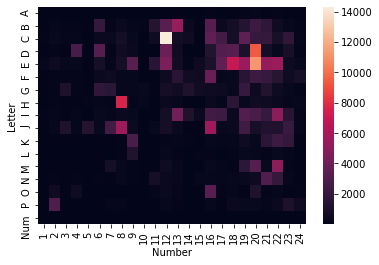

In [93]:
sns.heatmap(test7)

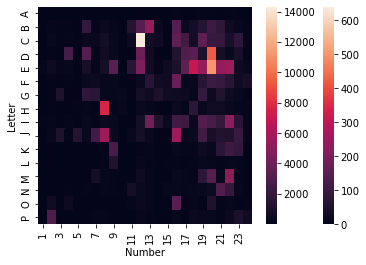

In [104]:
#Now try and make that a bit more efficient. This code works OK for reordering the data
for plate in miniplates:
    test = well_counts[plate]
    test = test.drop(columns = ['Plate', 'Patient', 'Cell_type'])
    test['Number'] = test['Well'].str.replace('([A-Z]+)', '')
    test['Letter'] = test['Well'].str.extract('([A-Z]+)')
    test = test.drop(columns = ['Well'])
    test = test.pivot(index = 'Letter', columns = 'Number', values = 'Count')
    test.columns = test.columns.to_flat_index()
    test = test.T
    test = test.reset_index()
    test['Number'] = test['Number'].astype(int)
    test = test.sort_values(by=['Number'])
    test = test.set_index('Number')
    test = test.T
    sns.heatmap(test)



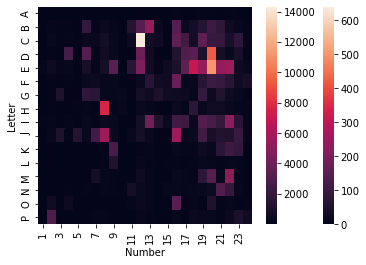

In [152]:
#Can I combine creating and plotting the well count data? 
#Yes, but now need to separate plots instead of putting them on top of each other - see next cell
well_counts2 = {}


for plate in miniplates: #iterate by plate
    rows = []
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well  
    well_counts2[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] ) #Put the output into a dataframe
    well_counts2[plate] = well_counts2[plate] #most code from here  reshapes the dataframe 
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Plate', 'Patient', 'Cell_type'])
    well_counts2[plate]['Number'] = well_counts2[plate]['Well'].str.replace('([A-Z]+)', '')
    well_counts2[plate]['Letter'] = well_counts2[plate]['Well'].str.extract('([A-Z]+)')
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Well'])
    well_counts2[plate] = well_counts2[plate].pivot(index = 'Letter', columns = 'Number', values = 'Count')
    well_counts2[plate].columns = well_counts2[plate].columns.to_flat_index()
    well_counts2[plate] = well_counts2[plate].T
    well_counts2[plate] = well_counts2[plate].reset_index()
    well_counts2[plate]['Number'] = well_counts2[plate]['Number'].astype(int)
    well_counts2[plate] = well_counts2[plate].sort_values(by=['Number'])
    well_counts2[plate] = well_counts2[plate].set_index('Number')
    well_counts2[plate] = well_counts2[plate].T
    sns.heatmap(well_counts2[plate])

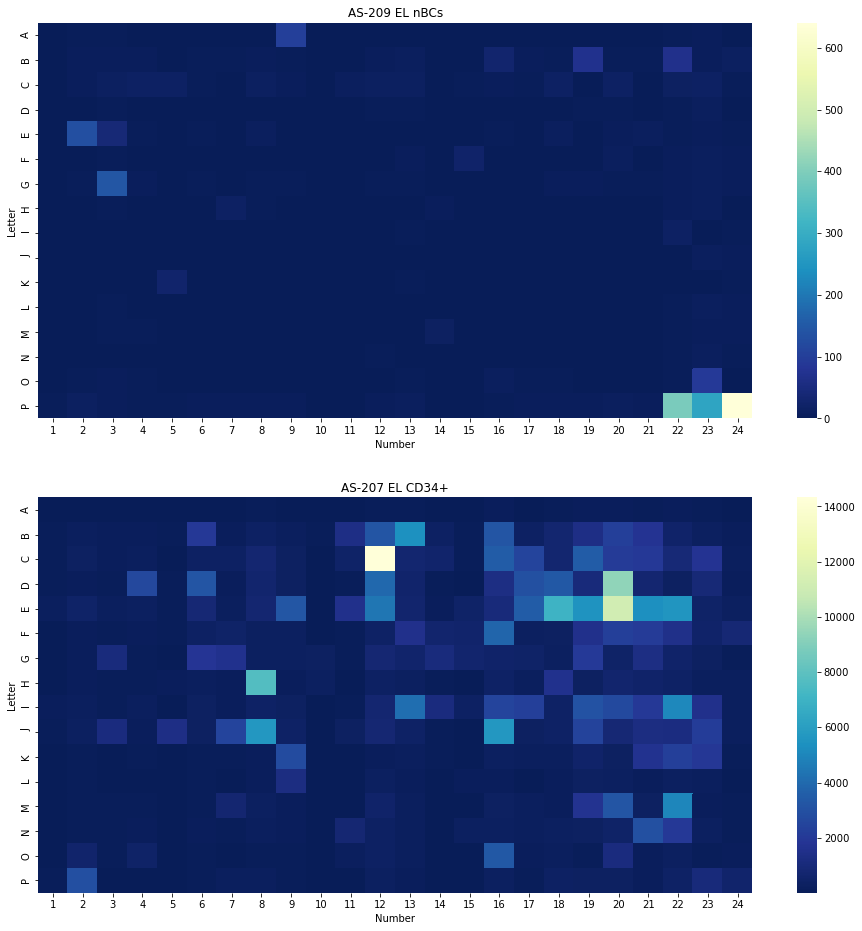

In [160]:
#Can I combine creating and plotting the well count data? 
#Yes, but now need to separate plots instead of putting them on top of each other - fixed

fig, axs = plt.subplots(2,1, figsize = (16, 16))

well_counts2 = {}
count = -1

for plate in miniplates: #iterate by plate
    rows = []
    count = count + 1
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well 
        
    well_counts2[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] ) #Put the output into a dataframe
    well_counts2[plate] = well_counts2[plate] #most code from here  reshapes the dataframe 
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Plate', 'Patient', 'Cell_type'])
    well_counts2[plate]['Number'] = well_counts2[plate]['Well'].str.replace('([A-Z]+)', '')
    well_counts2[plate]['Letter'] = well_counts2[plate]['Well'].str.extract('([A-Z]+)')
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Well'])
    well_counts2[plate] = well_counts2[plate].pivot(index = 'Letter', columns = 'Number', values = 'Count')
    well_counts2[plate].columns = well_counts2[plate].columns.to_flat_index()
    well_counts2[plate] = well_counts2[plate].T
    well_counts2[plate] = well_counts2[plate].reset_index()
    well_counts2[plate]['Number'] = well_counts2[plate]['Number'].astype(int)
    well_counts2[plate] = well_counts2[plate].sort_values(by=['Number'])
    well_counts2[plate] = well_counts2[plate].set_index('Number')
    well_counts2[plate] = well_counts2[plate].T
    
    axs[count] = sns.heatmap(well_counts2[plate], cmap = 'YlGnBu_r', ax = axs[count]) #Plot the data on the next ax
    axs[count].set_title(str(plate+' '+j+' '+m)) #set title to contain plate and cell type
    

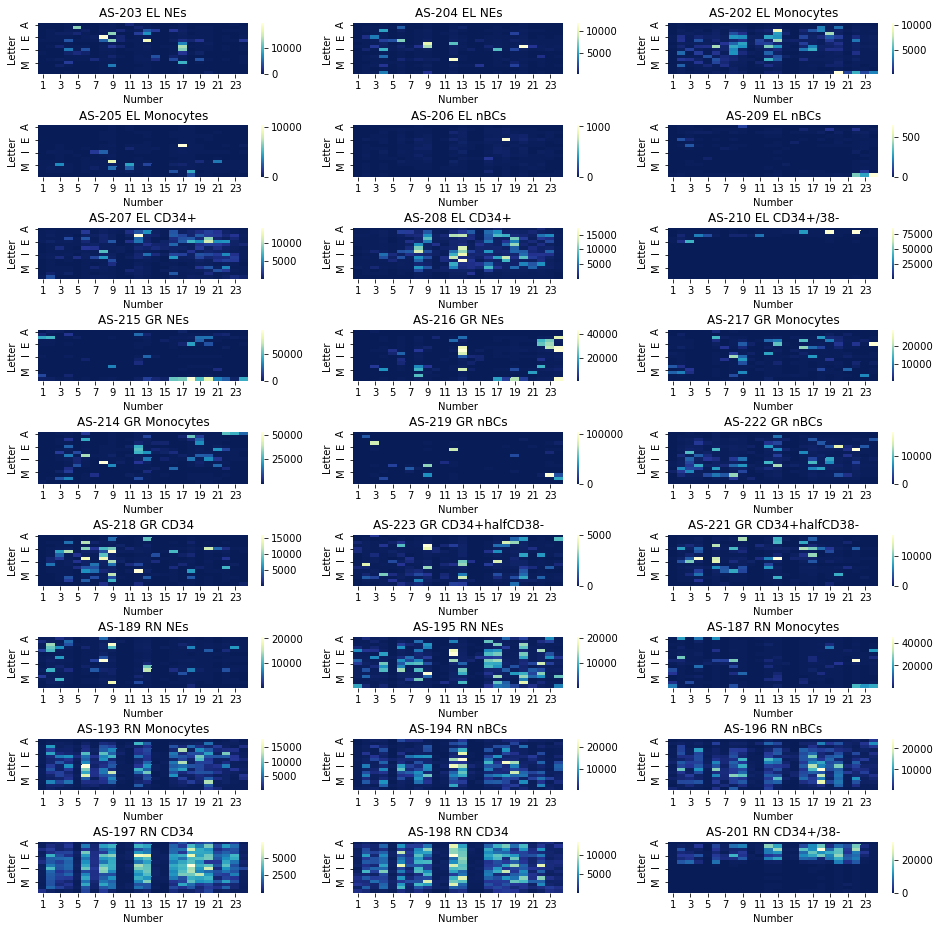

In [168]:
#Let's look at all 27 plates



fig, axs = plt.subplots(9,3, figsize = (16, 16))
fig.subplots_adjust(hspace = 1, wspace=.2)
axs = axs.ravel()


well_counts2 = {}
count = -1

for plate in plates: #iterate by plate
    rows = []
    count = count + 1
    i = allele_counts.loc[allele_counts['Plate'].isin([plate])] #make a df just contining plate information
    j = plate_pt_dict.get(plate) #use the dict to make a variable that contains the patient name for the current plate
    m = plate_cell_dict.get(plate) #use the dict to make a variable that contains the cell ype for the current plate
    for well in wells:
        total = i[well].astype(int).sum() #sum the read counts per well
        rows.append([plate, j, m, well, total]) #print the counts for each plate/well 
        
    well_counts2[plate] = pd.DataFrame(rows, columns = ['Plate', 'Patient', 'Cell_type', 'Well', 'Count'] ) #Put the output into a dataframe
    well_counts2[plate] = well_counts2[plate] #most code from here  reshapes the dataframe 
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Plate', 'Patient', 'Cell_type'])
    well_counts2[plate]['Number'] = well_counts2[plate]['Well'].str.replace('([A-Z]+)', '')
    well_counts2[plate]['Letter'] = well_counts2[plate]['Well'].str.extract('([A-Z]+)')
    well_counts2[plate] = well_counts2[plate].drop(columns = ['Well'])
    well_counts2[plate] = well_counts2[plate].pivot(index = 'Letter', columns = 'Number', values = 'Count')
    well_counts2[plate].columns = well_counts2[plate].columns.to_flat_index()
    well_counts2[plate] = well_counts2[plate].T
    well_counts2[plate] = well_counts2[plate].reset_index()
    well_counts2[plate]['Number'] = well_counts2[plate]['Number'].astype(int)
    well_counts2[plate] = well_counts2[plate].sort_values(by=['Number'])
    well_counts2[plate] = well_counts2[plate].set_index('Number')
    well_counts2[plate] = well_counts2[plate].T
    
    axs[count] = sns.heatmap(well_counts2[plate], cmap = 'YlGnBu_r', ax = axs[count]) #Plot the data on the next ax
    axs[count].set_title(str(plate+' '+j+' '+m)) #set title to contain plate and cell type

#fig.tight_layout()
fig.savefig('../Data/well_counts_total.png',   dpi=600)    